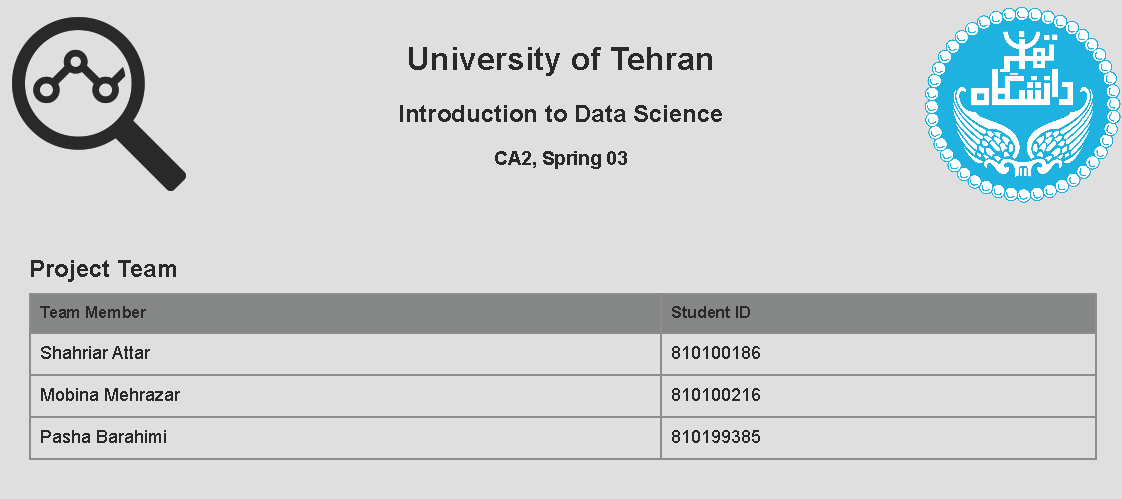


# Investigating Open-Ended Questions

## Table of Contents

-   [Investigating Open-Ended Questions](#Investigating-Open-Ended-Questions)
    -   [Introduction](#Introduction)
    -   [Objectives](#Objectives)
    -   [Tasks](#Tasks)
    -   [Considerations](#Considerations)
    -   [Environment Setup](#Environment-Setup)
    -   [RMS Lusitania (Sunken Ship)](<#RMS-Lusitania-(Sunken-Ship)>)
        -   [Questions Task 1](#Questions-Task-1)
    -   [Scientists Salaries](#Scientists-Salaries)
        -   [Questions Task 2](#Questions-Task-2)
    -   [Resources](#Resources)

## Introduction

This assignment includes specific tasks to investigate open-ended questions. The open-ended questions ask us to think creatively and critically about how the plots we have created provide insight into the data.

## Objectives

-   Getting familiar with `numpy`, `pandas`, and `matplotlib` libraries by looking at RMS Lusitania dataset.
-   Getting some insight into scientists' salaries by looking at the dataset provided.

## Tasks

-   Investigate the RMS Lusitania dataset.
-   Investigate the scientists' salaries dataset.

## Considerations

-   It's important to note that thorough analysis and interpretation of our findings and visualizations are crucial for a comprehensive evaluation in this section.
-   Based on what we have learnt so far, we need to apply different visualization techniques. Also, we need to check the distribution of variables. It’s up to us to decide which plot suits well for which variable(s). our task will be considered ‘successful’ if we have gained enough insights from this dataset.


## Environment Setup

Let's begin with setting up the Python environment and installing necessary libraries.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.gridspec as gridspec

from sklearn.preprocessing import LabelEncoder

from forex_python.converter import CurrencyRates

In [2]:
TASK_1_CSV = "../data/task1.csv"
TASK_2_CSV = "../data/task2.csv"

SALARY_RANGES = {
    "Less than $100K": 100000,
    "$100K - $200K": 200000,
    "$200K - $300K": 300000,
    "$300K - $400K": 400000,
    "More than $400K": 10000000
}

## RMS Lusitania (Sunken Ship)

The provided dataset (`task1.csv`) contains information about the passengers of the sunken ship ‘RMS Lusitania’. This is a brief explanation of the columns in the given dataset:

-   **survived**: Indicates if a passenger survived (1) or not (0).
-   **pclass**: The ticket class (1 = First class, 2 = Second class, 3 = Third class).
-   **sex**: The passenger's sex (male or female).
-   **age**: The passenger's age in years.
-   **sibsp**: The number of siblings or spouses the passenger had aboard the ship.
-   **parch**: The number of parents or children the passenger had aboard the ship.
-   **fare**: The fare the passenger paid for the ticket.
-   **embarked**: The port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton).
-   **class**: The class of the ticket the passenger had (First, Second, or Third).
-   **who**: Categorizes passengers as 'man', 'woman', or 'child', likely derived from age and sex.
-   **adult_male**: A boolean indicating if the passenger is an adult male or not.
-   **deck**: The deck the passenger's cabin was on, indicated by letters.
-   **embark_town**: The town from which the passenger embarked, corresponding to the 'embarked' codes.
-   **alive**: Indicates if the passenger survived ('yes') or not ('no')


### Questions Task 1


1. First, we'll read the file using the `pandas` library and save it in a `pandas` dataframe. Then, using the methods `info`, `head`, `tail`, `describe` from the `pandas` library, we examine the general structure of the data, and explain what information each of the outputs shows.


In [69]:
df = pd.read_csv(TASK_1_CSV)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


The `info()` method provides a concise summary of the dataframe. It shows the number of non-null values in each column, the data type of each column, and the memory usage of the dataframe. Also, it shows the number of columns and rows in the dataframe.


In [71]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


The `head(n)` method displays the first n rows of the dataframe. If n is not provided, it displays the first 5 rows by default.


In [72]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


The `tail(n)` method displays the last n rows of the dataframe. If n is not provided, it displays the last 5 rows by default.


In [73]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The `describe()` method generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution, excluding NaN values. It shows the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum values of each column in the dataframe. Obviously, the output of this method is only meaningful for numerical columns and other columns are ignored in the output. Also, we can change the percentiles to be returned by passing a list of percentiles to the `percentiles` parameter.


2. We first show the type of each data column. Some columns are of type categorical and some are of type numerical from the `pandas` library info. To process the non-numerical columns, one of the possible methods is labeling; in such a way that each of the categories is replaced by a number. For example, in this dataset, there is a categorical column named sex, which includes values Male and Female. We can modify the values of this column, so that each of these models is mapped to one of the numbers in the range $[0, 1]$.

Other methods can be used to process non-numerical columns, such as one-hot encoding, which is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. Another one is binary encoding, which is a combination of hashing and binary. First, the categories of a variable are encoded as ordinal, meaning integers are assigned to categories just like in integer encoding. Then, those integers are converted into binary code, resulting in binary digits or bits. There are other methods which we do not cover here, such as hashing encoding and so on.

Let's see an example for each one:

1. Labeling:

["Red", "Blue", "Green", "Red", "Green"] -> [0, 1, 2, 0, 2]

2. One-hot encoding:

| Color | is_red | is_blue | is_green |
| ----- | ------ | ------- | -------- |
| Red   | 1      | 0       | 0        |
| Blue  | 0      | 1       | 0        |
| Green | 0      | 0       | 1        |

["Red", "Blue", "Green", "Red", "Green"] -> [ [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1] ]

3. Binary encoding:

| Color | Encoded |
| ----- | ------- |
| Red   | 01      |
| Blue  | 10      |
| Green | 11      |

["Red", "Blue", "Green", "Red", "Green"] -> [01, 10, 11, 01, 11]


In [74]:
label_encoder = LabelEncoder()

labels : dict[str, np.ndarray] = {}
for column in df.columns:
    if df[column].dtype == "object":
        column_data = df[column].dropna()  # Exclude NaN values from the label encoder
        labels[column] = column_data.unique()
        df.loc[column_data.index, column] = label_encoder.fit_transform(column_data)

df = df.infer_objects()  # Convert columns to their appropriate types


In [75]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2.0,2,1,True,NaN,2.0,0,False
1,1,1,0,38.0,1,0,71.2833,0.0,0,2,False,2.0,0.0,1,False
2,1,3,0,26.0,0,0,7.9250,2.0,2,2,False,NaN,2.0,1,True
3,1,1,0,35.0,1,0,53.1000,2.0,0,2,False,2.0,2.0,1,False
4,0,3,1,35.0,0,0,8.0500,2.0,2,1,True,NaN,2.0,0,True


We can see that the following columns are encoded:

-   sex
-   embarked
-   class
-   who
-   deck
-   embark_town
-   alive

Some of these encoded columns' type are `float64` to have the ability to store `NaN` values.


3. Then, we will generate a heatmap of the correlation matrix for numerical features in the dataset.


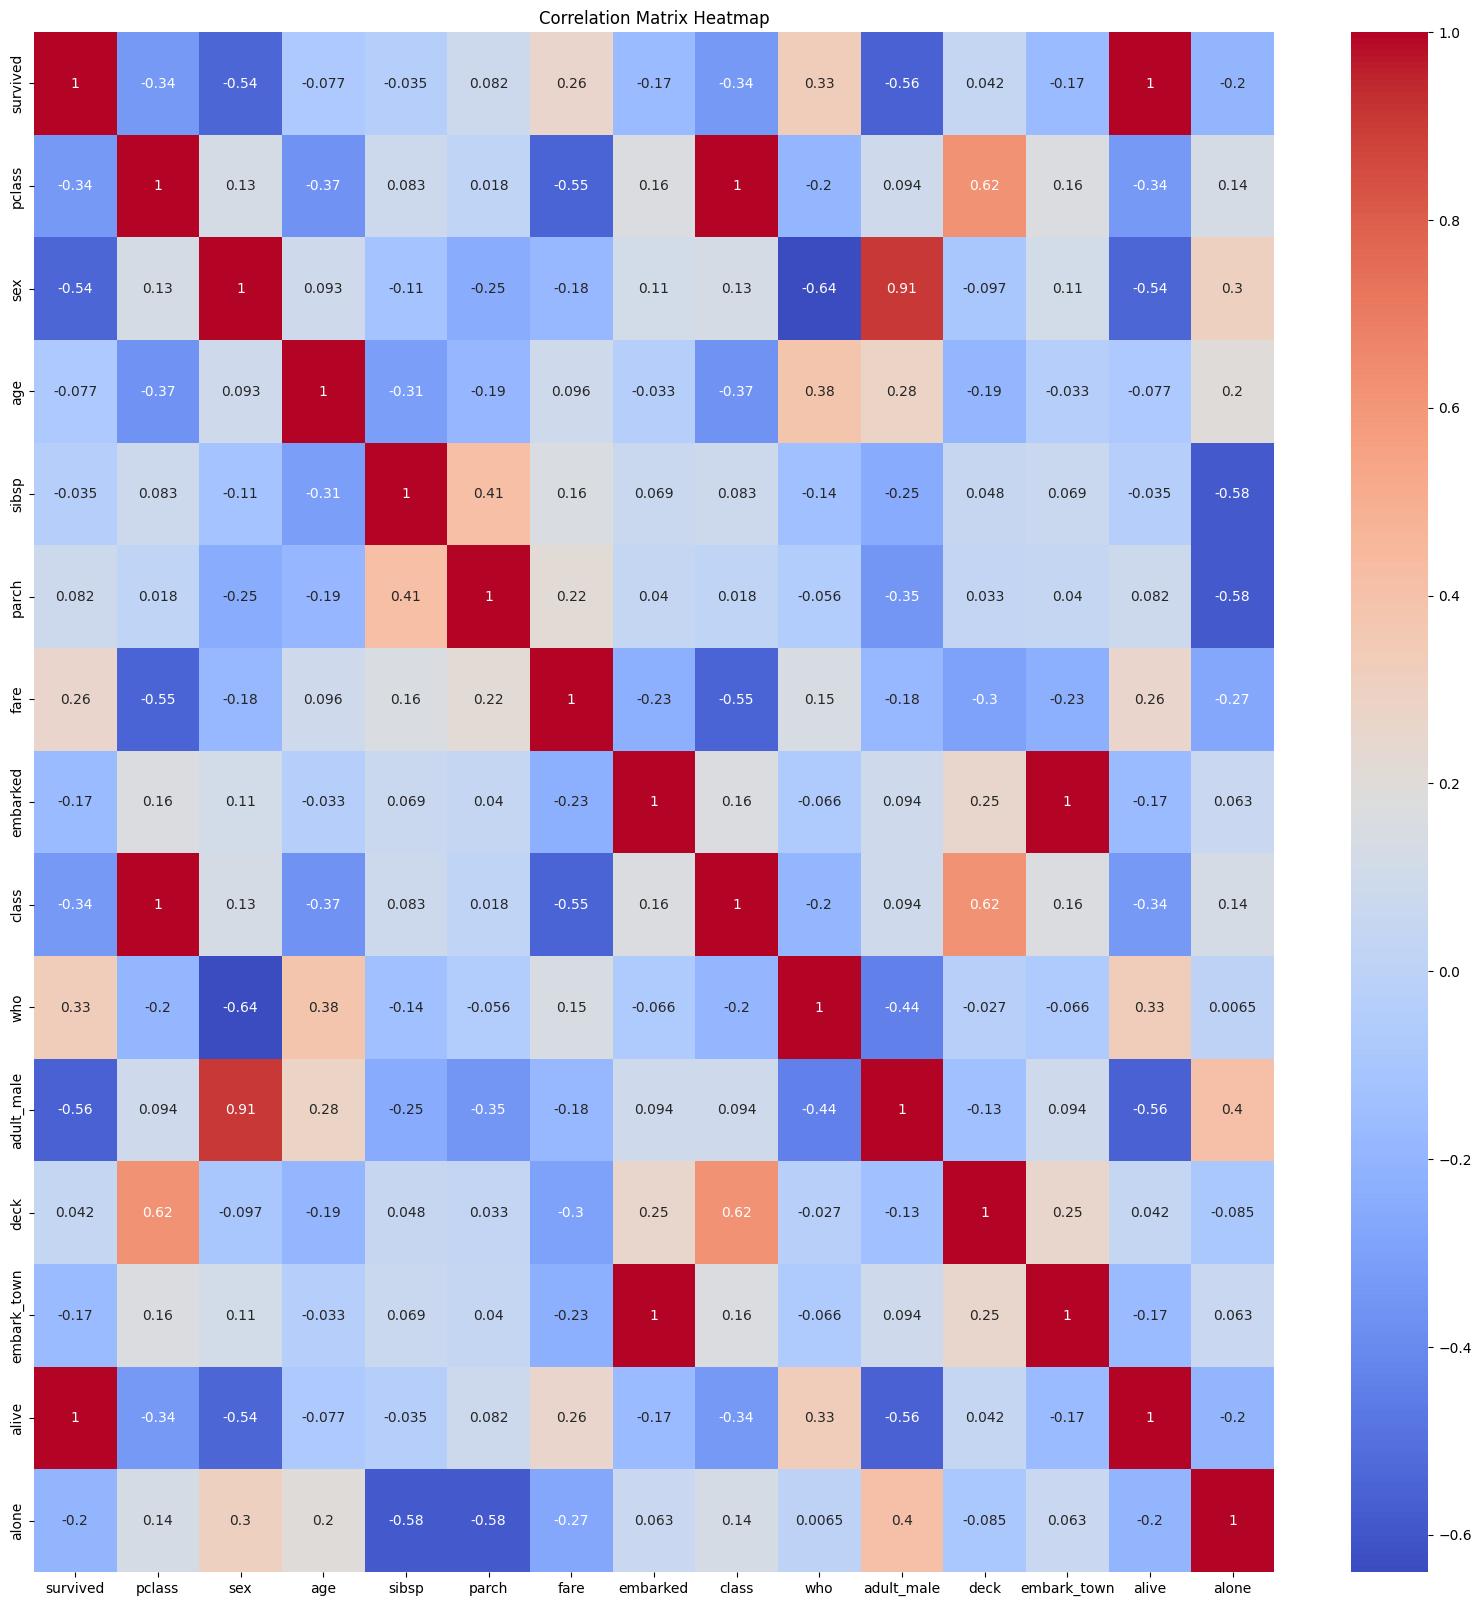

In [76]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

4. Columns that are not on the main diagonal and have a correlation of 1 mean that one column is extra and can be removed. Therefore, based on this, we'll delete the extra columns that meet these conditions.


The following pairs of columns have a correlation of 1:

-   survived and alive: alive is the same as survived
-   pclass and class: pclass is the encoded version of class
-   embarked and embark_town: embarked is the encoded version of embark_town

Also, there is a high correlation between some of the columns. Some of these columns are as follows:

-   adult_male and (sex, age): adult_male is generated from sex and age
-   who and (sex, age): who is generated from sex and age
-   alone and (sibsp, parch): alone is generated from sibsp and parch


In [77]:
corr_matrix = df.corr()

columns_to_remove = []
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        if corr_matrix.iloc[i, j] == 1:
            if corr_matrix.columns[j] != "class":  # Do not remove the class column for further use
                columns_to_remove.append(corr_matrix.columns[j])

df = df.drop(columns=columns_to_remove)

In [78]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
0,0,3,1,22.0,1,0,7.2500,2.0,2,1,True,NaN,False
1,1,1,0,38.0,1,0,71.2833,0.0,0,2,False,2.0,False
2,1,3,0,26.0,0,0,7.9250,2.0,2,2,False,NaN,True
3,1,1,0,35.0,1,0,53.1000,2.0,0,2,False,2.0,False
4,0,3,1,35.0,0,0,8.0500,2.0,2,1,True,NaN,True


The additional columns are removed from the dataset.


5. Let's find the number of passengers survived (survived == 1) the disaster


In [79]:
survived_count = df["survived"].sum()
print("Number of passengers survived:", survived_count)

Number of passengers survived: 342


6. Then, we'll find the number of female passengers aged more than 30 years


In [80]:
female_old_passengers = df[(df["sex"] == 0) & (df["age"] > 30)]
num_female_passengers = len(female_old_passengers)
print("Number of female passengers aged more than 30 years:", num_female_passengers)

Number of female passengers aged more than 30 years: 103


7. After that, we're going to identify passengers who embarked from Cherbourg ('C') and paid a fare greater than $100


In [81]:
cherbourg_passengers_with_fare_more_than_100 = df[
    (df["embarked"] == labels["embarked"].tolist().index("C")) &
    (df["fare"] > 100)
]
print("Number of passengers embarked from Cherbourg and paid a fare greater than $100:",
      len(cherbourg_passengers_with_fare_more_than_100))

Number of passengers embarked from Cherbourg and paid a fare greater than $100: 0


8. Let's identify columns with missing values, propose and apply a strategy for handling these missing values

    Handling missing values is a crucial step in the data preprocessing phase of any data analysis or machine learning project. Some common strategies are as follows:

    1. **Listwise Deletion**: This method involves removing entire observations where any single value is missing. This is the simplest method, but it can lead to loss of information if the missing data is not completely at random.

    2. **Pairwise Deletion**: In this method, only the specific missing values are deleted. This method is used when values are missing completely at random.

    3. **Mean/Median/Mode Imputation**: This involves replacing the missing values with the mean (for continuous data), median (for ordinal data), or mode (for categorical data). This method is quick and easy but can lead to an underestimation of the variance.

    4. **Prediction Models**: Missing values are predicted using methods like regression, using the other variables in the data. While this can be a very accurate method, it can also be time-consuming.

    5. **Multiple Imputation**: This is a more sophisticated version of prediction models. It creates multiple predictions for each missing value, resulting in multiple complete datasets. These are then analyzed separately, and the results are pooled to give a final result.

    6. **Last Observation Carried Forward (LOCF)**: This method is often used in time-series data where the last known value is used to replace the missing value.

    7. **Next Observation Carried Backward (NOCB)**: This is the opposite of LOCF, the next known value is used to replace the missing value.

    Let's check the columns with missing values and propose a strategy for handling them.


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         714 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    float64
 8   class       891 non-null    int64  
 9   who         891 non-null    int64  
 10  adult_male  891 non-null    bool   
 11  deck        203 non-null    float64
 12  alone       891 non-null    bool   
dtypes: bool(2), float64(4), int64(7)
memory usage: 78.4 KB


We can use a combination of these methods based on the nature of the data and the missing values. It is important to remember that the method chosen can have a significant impact on the results of the analysis. The following columns have missing values in the dataset:

1. **age**: 177 missing values
2. **embarked**: 2 missing values
3. **deck**: 688 missing values

For the `deck` column, we can see that it has a large number of missing values (688 out of 891). It might be better to drop this column entirely as imputing the missing values might introduce bias into the analysis. For the `age` column, we can use mean or median imputation to fill in the missing values. For the `embarked` column, we can use mode imputation to fill in the missing values, or we can drop the rows with missing values if they are not significant.


In [83]:
df = df.drop(columns=["deck"])
df["age"] = df["age"].fillna(df["age"].mean())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode().iloc[0])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    float64
 8   class       891 non-null    int64  
 9   who         891 non-null    int64  
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(3), int64(7)
memory usage: 71.5 KB


9. Let's calculate the average age of passengers on the ship. Then, we'll calculate the age difference between the males and females.


In [85]:
average_age = df["age"].mean()
male_age = df[df["sex"] == labels["sex"].tolist().index("male")]["age"].mean()
female_age = df[df["sex"] == labels["sex"].tolist().index("female")]["age"].mean()
age_difference = male_age - female_age

print("Average Age of Passengers:", average_age)
print("Average Age of Males:", male_age)
print("Average Age of Females:", female_age)
print("Age Difference between Males and Females:", age_difference)

Average Age of Passengers: 29.69911764705882
Average Age of Males: 28.21673004870738
Average Age of Females: 30.505824243042102
Age Difference between Males and Females: -2.289094194334723


10. Then, we will investigate the probable correlation between fare paid and survival rate, and provide a statistical summary.


In [86]:
correlation = df["fare"].corr(df["survived"])
summary = df[["fare", "survived"]].describe()

print("Correlation between fare paid and survival rate:", correlation)
print("\nStatistical summary of fare paid and survival rate:")
print(summary)

Correlation between fare paid and survival rate: 0.2573065223849622

Statistical summary of fare paid and survival rate:
             fare    survived
count  891.000000  891.000000
mean    32.204208    0.383838
std     49.693429    0.486592
min      0.000000    0.000000
25%      7.910400    0.000000
50%     14.454200    0.000000
75%     31.000000    1.000000
max    512.329200    1.000000


We can see that the correlation between fare and survival is 0.26, which indicates a weak positive correlation. This means that as the fare increases, the chances of survival also increase slightly. However, the correlation is not very strong, so we cannot make strong conclusions based on this alone.


11. In this step, we use `Matplotlib` to plot the proportion of passengers that survived by class.


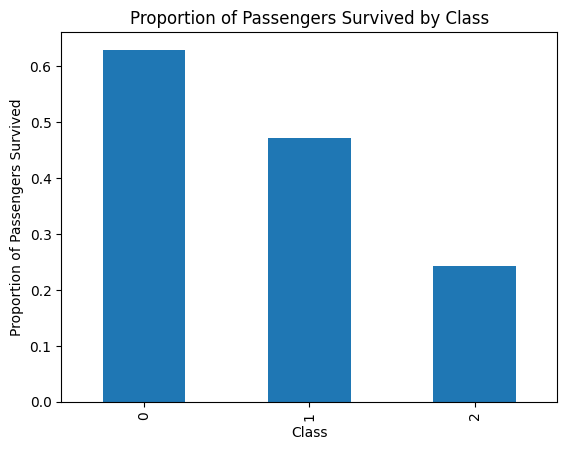

In [90]:
survived_by_class = df.groupby("class")["survived"].mean()
survived_by_class.plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Proportion of Passengers Survived")
plt.title("Proportion of Passengers Survived by Class")
plt.show()

As we can see from the plot, the survival rate is highest for first-class passengers, followed by second-class passengers, and then third-class passengers. This indicates that there was a significant difference in survival rates based on the class of the passengers.


12. We'll then plot the age distribution of passengers, while distinguishing between those who survived and those who didn't.


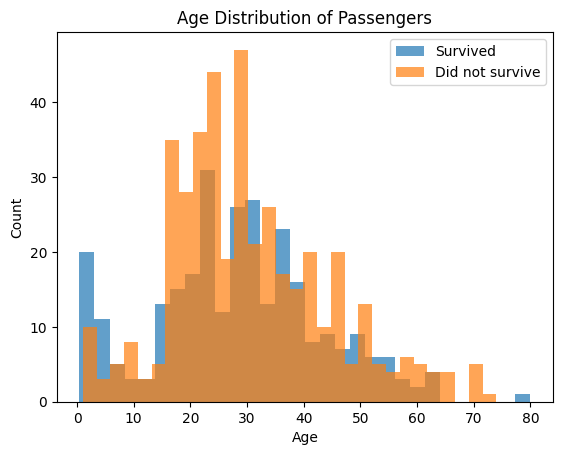

In [45]:
plt.hist(df[df["survived"] == 1]["age"], bins=30, alpha=0.7, label="Survived")
plt.hist(df[df["survived"] == 0]["age"], bins=30, alpha=0.7, label="Did not survive")

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers")
plt.legend()
plt.show()

As we can see from the plot, the age distribution of passengers who survived and those who did not is quite similar. However, there seems to be a slightly higher proportion of younger passengers who survived compared to those who did not.


13. Then, we create a scatter plot showing the relationship between age and fare paid, color-coded by survival.


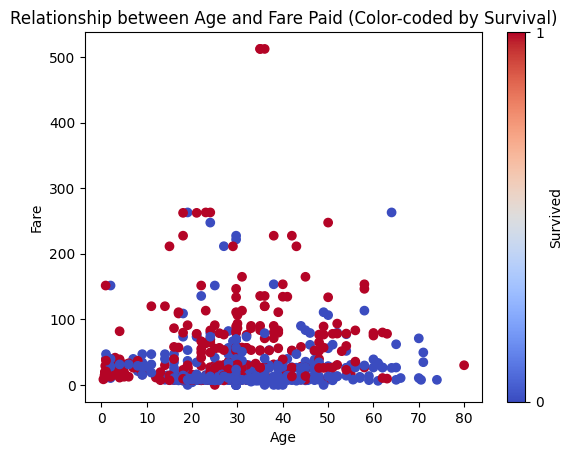

In [76]:
plt.scatter(df["age"], df["fare"], c=df["survived"], cmap="coolwarm")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Relationship between Age and Fare Paid (Color-coded by Survival)")
plt.colorbar(label="Survived", ticks=[0, 1])
plt.show()

The scatter plot shows the relationship between age and fare paid, color-coded by survival. We can see that there is no clear pattern in the relationship between age and fare paid, and survival. The points are scattered across the plot, indicating that there is no strong relationship between these variables. However, we can see that in the higher fare range, there are more survivors compared to non-survivors, and also children has a really low chance of survival.


14. After that, we'll create a pivot table to show the average fare and survival rate for each class and sex combination.  
    Pivot plots are a great way to summarize and visualize data. They allow us to aggregate and summarize data in a way that makes it easy to see patterns and trends. Each cell in the pivot table shows the average fare and survival rate for a specific combination.


In [77]:
pivot_table = df.pivot_table(
    values=["fare", "survived"],
    index=["class", "sex"],
    aggfunc={"fare": "mean", "survived": "mean"},
)
print(pivot_table)

                 fare  survived
class sex                      
0     0    106.125798  0.968085
      1     67.226127  0.368852
1     0     21.970121  0.921053
      1     19.741782  0.157407
2     0     16.118810  0.500000
      1     12.661633  0.135447


We can see the highest survival rate for females (sex == 0) in first-class and second-class passengers. Also, the average fare for the first-class passengers is very different between the males and the females. The lowest survival rate is for the males in the second and third class.


15. And finally, we'll plot a grouped bar chart using `Matplotlib` to show the average fare paid by passengers, grouped by their class and survival status


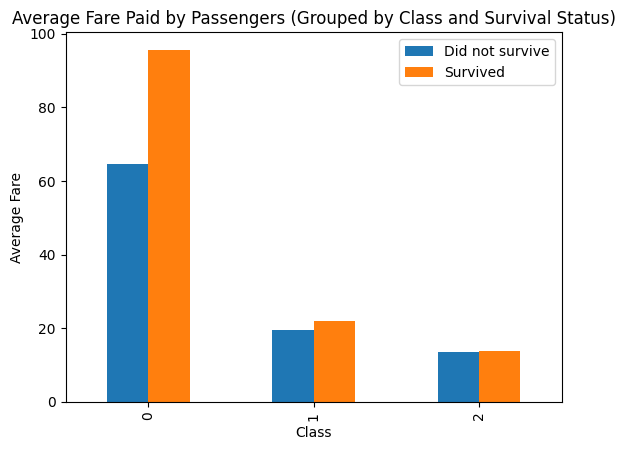

In [78]:
grouped_data = df.groupby(["class", "survived"])["fare"].mean()
grouped_data.unstack().plot(kind="bar")

plt.xlabel("Class")
plt.ylabel("Average Fare")
plt.title("Average Fare Paid by Passengers (Grouped by Class and Survival Status)")
plt.legend(["Did not survive", "Survived"])
plt.show()

The grouped bar chart shows the average fare paid by passengers, grouped by their class and survival status. We can see that the average fare paid by survivors is higher than that of non-survivors in all classes. This indicates that passengers who paid higher fares had a higher chance of survival. Also, the average fare paid by first-class passengers is much higher than that of second and third-class passengers, regardless of survival status.


## Scientists Salaries

This dataset (`task2.csv`) focuses on data scientist salaries across different regions from 2020 to 2024.


### Questions Task 2


1. At first, it's better to do some pre-analysis to delete duplicates and NA (missing) data if they exist. Then, since salaries are inherently tied to each respective country's currency, we need to standardize them to a single currency for meaningful comparisons. We begin by identifying the currencies present in the dataset. Given the many currencies, let's examine their frequencies and remove data associated with currencies represented fewer than ten times


In [3]:
df = pd.read_csv(TASK_2_CSV)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         13972 non-null  int64 
 1   Experience_Level  13972 non-null  object
 2   Employment_Type   13972 non-null  object
 3   Job_Title         13972 non-null  object
 4   Salary            13972 non-null  int64 
 5   Salary_Currency   13972 non-null  object
 6   Remote_Ratio      13972 non-null  int64 
 7   Company_Size      13972 non-null  object
dtypes: int64(3), object(5)
memory usage: 873.4+ KB


In [5]:
df.head()

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium


Let's check for missing values in the dataset.


In [6]:
nan_count = df.isna().sum()
print(nan_count)

Work_Year           0
Experience_Level    0
Employment_Type     0
Job_Title           0
Salary              0
Salary_Currency     0
Remote_Ratio        0
Company_Size        0
dtype: int64


As we can see, there is no missing data in the dataset to handle. Now, let's move on to the next step and check for duplicates in the dataset.


In [7]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

5565


As we can see, there are 5565 duplicates in the dataset. We need to remove these duplicates to avoid any bias in the analysis. Let's remove the duplicates and check the shape of the dataset again.


In [8]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8407 entries, 0 to 8406
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         8407 non-null   int64 
 1   Experience_Level  8407 non-null   object
 2   Employment_Type   8407 non-null   object
 3   Job_Title         8407 non-null   object
 4   Salary            8407 non-null   int64 
 5   Salary_Currency   8407 non-null   object
 6   Remote_Ratio      8407 non-null   int64 
 7   Company_Size      8407 non-null   object
dtypes: int64(3), object(5)
memory usage: 525.6+ KB


Now, let's identify the currencies present in the dataset and examine their frequencies. We will remove data associated with currencies represented fewer than ten times.


In [10]:
df["Salary_Currency"].value_counts()

Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
PLN       7
CHF       6
SGD       6
JPY       4
BRL       4
DKK       3
HUF       3
TRY       3
NOK       2
THB       2
ZAR       1
HKD       1
ILS       1
PHP       1
NZD       1
MXN       1
CLP       1
Name: count, dtype: int64

In [11]:
df = df[df["Salary_Currency"].map(df["Salary_Currency"].value_counts()) > 10]
df = df.reset_index(drop=True)

In [12]:
df["Salary_Currency"].value_counts()

Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
Name: count, dtype: int64

Then we replace abbreviations with full names of the size of the company.


In [13]:
df["Company_Size"] = df["Company_Size"].replace({"S": "Small", "M": "Medium", "L": "Large"})
df["Job_Title"] = df["Job_Title"].replace({"ML Engineer": "Machine Learning Engineer"})

In [14]:
df.head()

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium


2. In this phase, we'll convert these currencies to USD. We can do this in two ways:

    - Manually searching for the exchange rates via online resources such as Google.
    - Utilizing software packages like `Forex-Python` for streamlined conversion.

We will use the `Forex-Python` package to convert the currencies to USD.


In [15]:
df.tail()

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
8355,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large
8356,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large
8357,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,Small
8358,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large
8359,2021,Senior-Level,Full-Time,Data Science Manager,7000000,INR,50,Large


Let's consider the last row of the dataset (INR currency) to validate the conversion.


In [16]:
c = CurrencyRates()
rates = {currency: c.get_rate(currency, "USD") for currency in df["Salary_Currency"].unique()}
print(rates)

{'USD': 1.0, 'EUR': 1.0768, 'GBP': 1.2578704514923194, 'CAD': 0.7416999586719933, 'AUD': 0.6519343706484229, 'INR': 0.012047235725513668}


In [17]:
df["Salary_USD"] = df["Salary_Currency"].map(rates) * df["Salary"]
df = df.drop(columns=["Salary_Currency", "Salary"])

In [18]:
df.tail()

,Work_Year,Experience_Level,Employment_Type,Job_Title,Remote_Ratio,Company_Size,Salary_USD
8355,2020,Senior-Level,Full-Time,Data Scientist,100,Large,412000.000000
8356,2021,Mid-Level,Full-Time,Principal Data Scientist,100,Large,151000.000000
8357,2020,Entry-Level,Full-Time,Data Scientist,100,Small,105000.000000
8358,2020,Entry-Level,Contract,Business Data Analyst,100,Large,100000.000000
8359,2021,Senior-Level,Full-Time,Data Science Manager,50,Large,84330.650079


We can see that the conversion is successful, and the salary in INR has been converted to USD.


3. Now, leveraging the insights gleaned from the dataset, we employ various Exploratory Data Analysis (EDA) techniques to extract valuable insights. For instance, we could identify the top 10 most popular job titles or the top 10 highest salaries. But before doing that we check the distribution of the salaries.


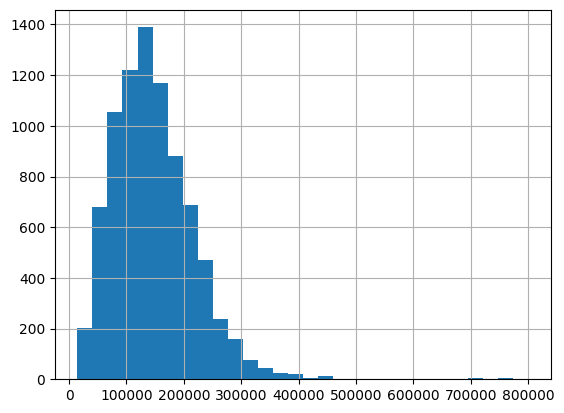

In [19]:
df["Salary_USD"].hist(bins=30)
plt.show()

Then we add new column which shows salary class based on the salary value.


In [20]:
df["Salary_Range"] = df["Salary_USD"].apply(lambda x: next((k for k, v in SALARY_RANGES.items() if x <= v), None))
df

,Work_Year,Experience_Level,Employment_Type,Job_Title,Remote_Ratio,Company_Size,Salary_USD,Salary_Range
0,2024,Senior-Level,Full-Time,AI Engineer,0,Large,90000.000000,Less than $100K
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,0,Medium,180500.000000,$100K - $200K
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,0,Medium,96200.000000,Less than $100K
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,0,Medium,235000.000000,$200K - $300K
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,0,Medium,175000.000000,$100K - $200K
...,...,...,...,...,...,...,...,...
8355,2020,Senior-Level,Full-Time,Data Scientist,100,Large,412000.000000,More than $400K
8356,2021,Mid-Level,Full-Time,Principal Data Scientist,100,Large,151000.000000,$100K - $200K
8357,2020,Entry-Level,Full-Time,Data Scientist,100,Small,105000.000000,$100K - $200K
8358,2020,Entry-Level,Contract,Business Data Analyst,100,Large,100000.000000,Less than $100K


In [34]:
def plot_barh(data: pd.Series, title: str, xlabel: str, ylabel: str, ax: Axes = None) -> None:
    if ax is None:
        ax = plt.subplots(figsize=(20, 5))[-1]
    
    data.plot(kind="barh", ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for i, v in enumerate(data):
        ax.text(v, i, str(v), color="black", va="center")
    ax.figure.subplots_adjust(right=1)  # Adjust the right margin
    

In [35]:
def plot_line_chart(data: pd.Series, title: str, xlabel: str, ylabel: str, ax: Axes = None) -> None:
    if ax is None:
        ax = plt.subplots(figsize=(20, 5))[-1]
        
    data.plot(marker="o", linestyle="-", color="b", ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(data.index, rotation=90)
    ax.figure.subplots_adjust(right=1)  # Adjust the right margin

In [36]:
def plot_contingency_table(data: pd.DataFrame, title: str, xlabel: str, ylabel: str, ax: Axes = None) -> None:
    if ax is None:
        ax = plt.subplots(figsize=(20, 5))[-1]
    
    cols = data.columns.tolist()
    cols.sort(key=lambda x: SALARY_RANGES[x])
    data = data[cols]
          
    sns.heatmap(data, annot=True, cmap="coolwarm", ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [37]:
def plot_mosaic_chart(data: pd.DataFrame, title: str, xlabel: str, ylabel: str, category: str, ax: Axes = None) -> None:
    if ax is None:
        ax = plt.subplots(figsize=(20, 5))[-1]
    
    grouped = data.groupby(category)["Salary_Range"].value_counts().unstack(fill_value=0)
    cols = grouped.columns.tolist()
    cols.sort(key=lambda x: SALARY_RANGES[x])
    grouped = grouped[cols]
    
    grouped_series = grouped.stack()
    mosaic(grouped_series, ax=ax, title=title, gap=0.01, labelizer=lambda k: "", label_rotation=[90, 0])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [38]:
def plot_mean_salary(data: pd.DataFrame, title: str, xlabel: str, ylabel: str, category: str, largest: bool = True) -> None:
    grouped = data.groupby(category)["Salary_USD"].mean().astype(int)
    grouped = grouped.nlargest(10) if largest else grouped.nsmallest(10)
    plot_barh(grouped, title, xlabel, ylabel)

In [39]:
def plot_side_by_side_boxplot(
    data: pd.DataFrame,
    title: str,
    xlabel: str,
    ylabel: str,
    category: str,
    value: str,
    ax: Axes = None,
) -> None:
    if ax is None:
        ax = plt.subplots(figsize=(20, 5))[-1]

    sns.boxplot(x=category, y=value, data=data, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [40]:
def plot_side_by_side_violinplot(
    data: pd.DataFrame,
    title: str,
    xlabel: str,
    ylabel: str,
    category: str,
    value: str,
    ax: Axes = None,
) -> None:
    if ax is None:
        ax = plt.subplots(figsize=(20, 5))[-1]
    
    sns.violinplot(x=category, y=value, data=data, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [58]:
def plot_all(
    data: pd.DataFrame,
    category: str,
    largest: bool = True,
) -> None:
    
    axes = plt.subplots(3, 2, figsize=(20, 33))[1].flatten()
    plt.subplots_adjust(hspace=.4)
    
    selected_titles = (
        data[category].value_counts().nlargest(10)
        if largest
        else data[category].value_counts().nsmallest(10)
    )
    selected_data = data[data[category].isin(selected_titles.index)]
    selected_data = selected_data.reset_index(drop=True)
    selected_data.sort_values(by="Salary_USD", inplace=True)
    
    plot_barh(
        selected_titles,
        "Number of Respondents by " + category,
        "Count",
        category,
        axes[0],
    )
    
    plot_line_chart(
        selected_titles,
        "Number of Respondents by " + category,
        category,
        "Count",
        axes[1],
    )
    
    plot_contingency_table(
        pd.crosstab(selected_data[category], selected_data["Salary_Range"]),
        "Contingency Table of " + category + " and Salary Range",
        category,
        "Salary Range",
        axes[2],
    )
    
    plot_mosaic_chart(
        selected_data,
        "Mosaic Chart of " + category + " and Salary Range",
        category,
        "Salary Range",
        category,
        axes[3],
    )
    
    plot_side_by_side_violinplot(
        selected_data,
        "Violin Plot of " + category + " and Salary",
        category,
        "Salary",
        category,
        "Salary_USD",
        axes[4],
    )
    
    plot_side_by_side_boxplot(
        selected_data,
        "Box Plot of " + category + " and Salary",
        category,
        "Salary",
        category,
        "Salary_USD",
        axes[5],
    )
    plt.show()
    
    plot_mean_salary(
        selected_data,
        "Mean Salary by " + category,
        category,
        "Mean Salary",
        category,
        largest,
    )

-   Let's analyze the top 10 most paid job titles in the dataset.


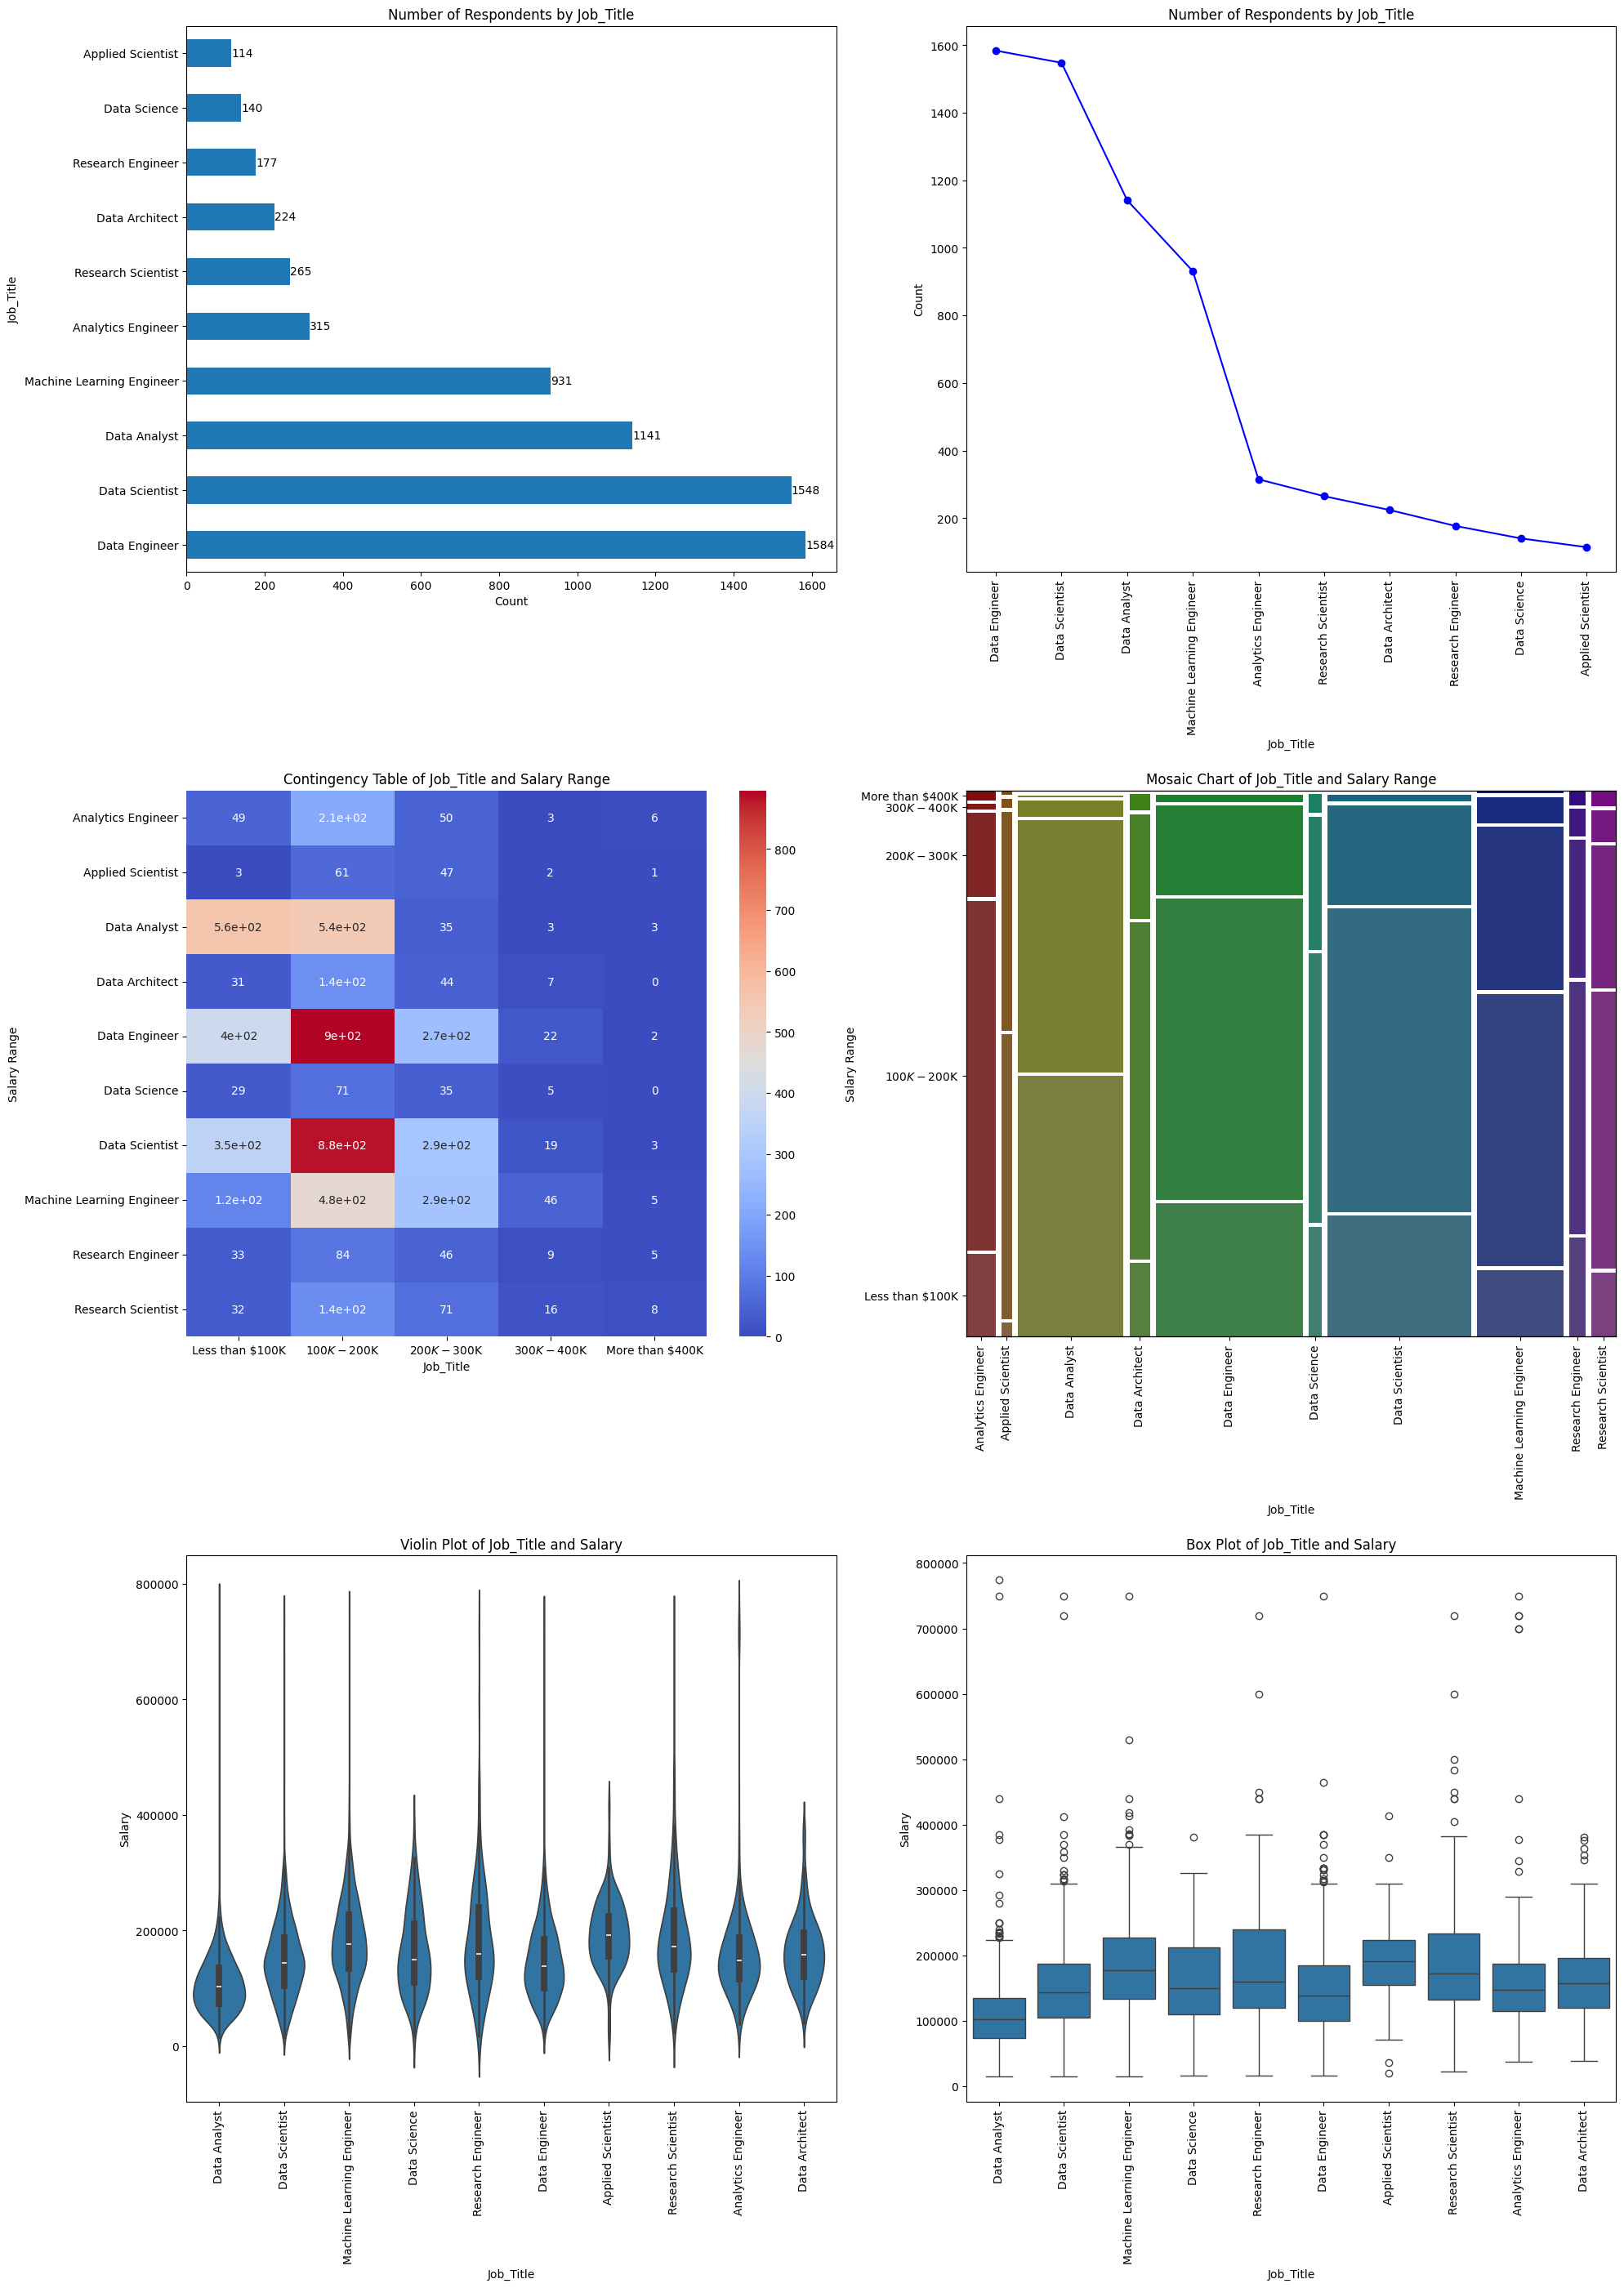

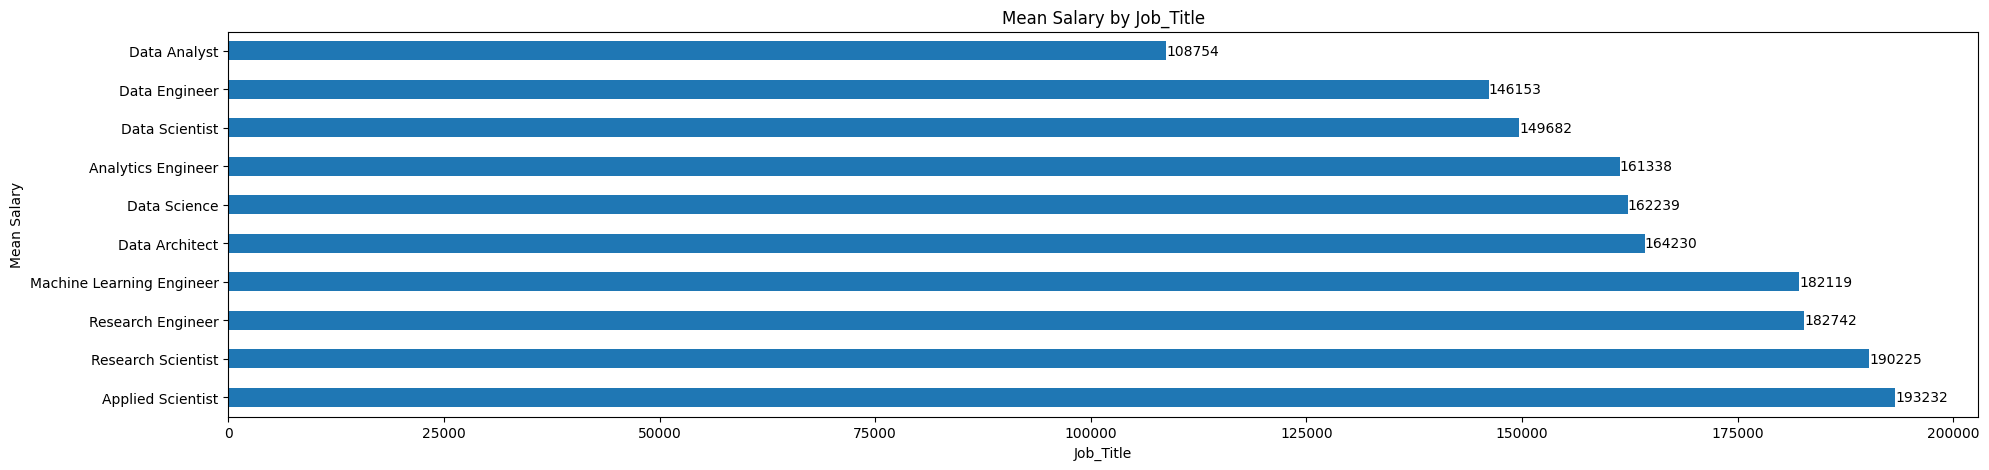

In [62]:
plot_all(df, "Job_Title", largest=True)

As we can see, the most popular job title is 'Data Engineer', followed by 'Data Scientist' and 'Data Analyst'. This information can be useful for understanding the job market and the demand for different roles in the data science field. Also, we can see the salary distribution of these job titles in the violin plot. We can also observe that the job titles 'Analytics Engineering Manager' and 'Data Science Team Lead' have the highest average salaries in the dataset and the others are following them with a huge gap.


-   Then, we will find the top 10 highest salaries in the dataset.


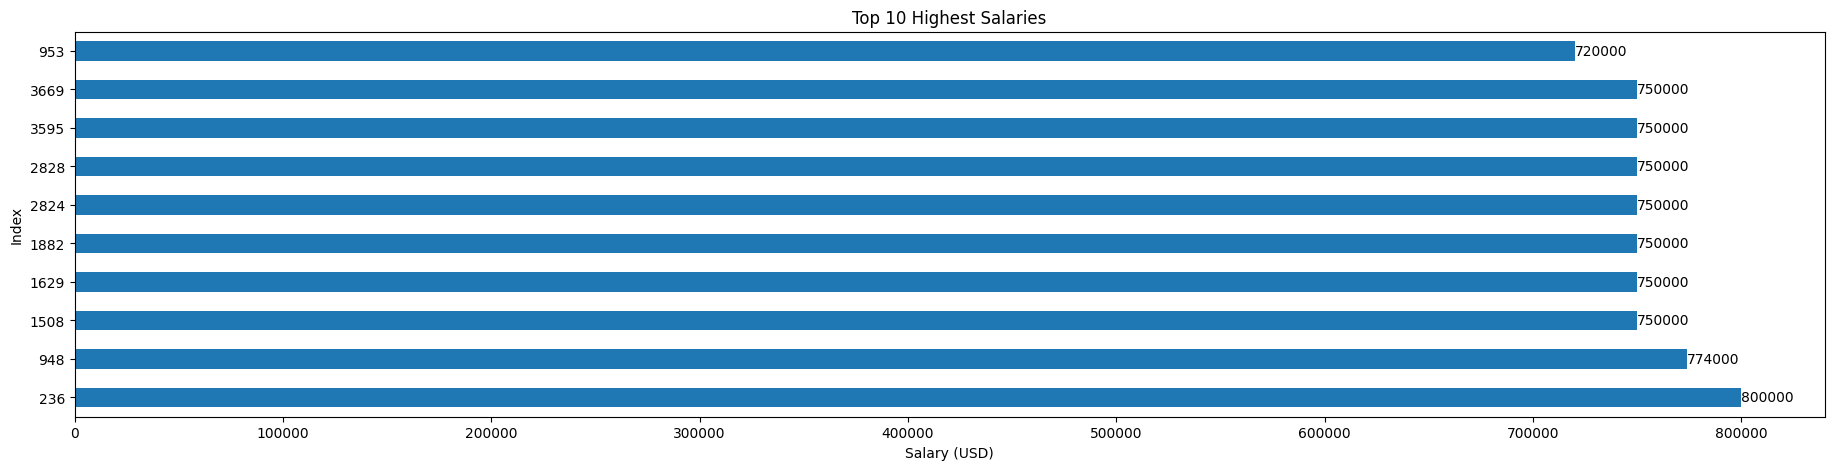

In [63]:
top_10_highest_salaries = df["Salary_USD"].nlargest(10).astype(int)
plot_barh(top_10_highest_salaries, "Top 10 Highest Salaries", "Salary (USD)", "Index")

The top 10 highest salaries in the dataset are in the range of $720,000 to $800,000.


-   We can also find the top 10 job titles with the lowest salaries (average salary for each job title).


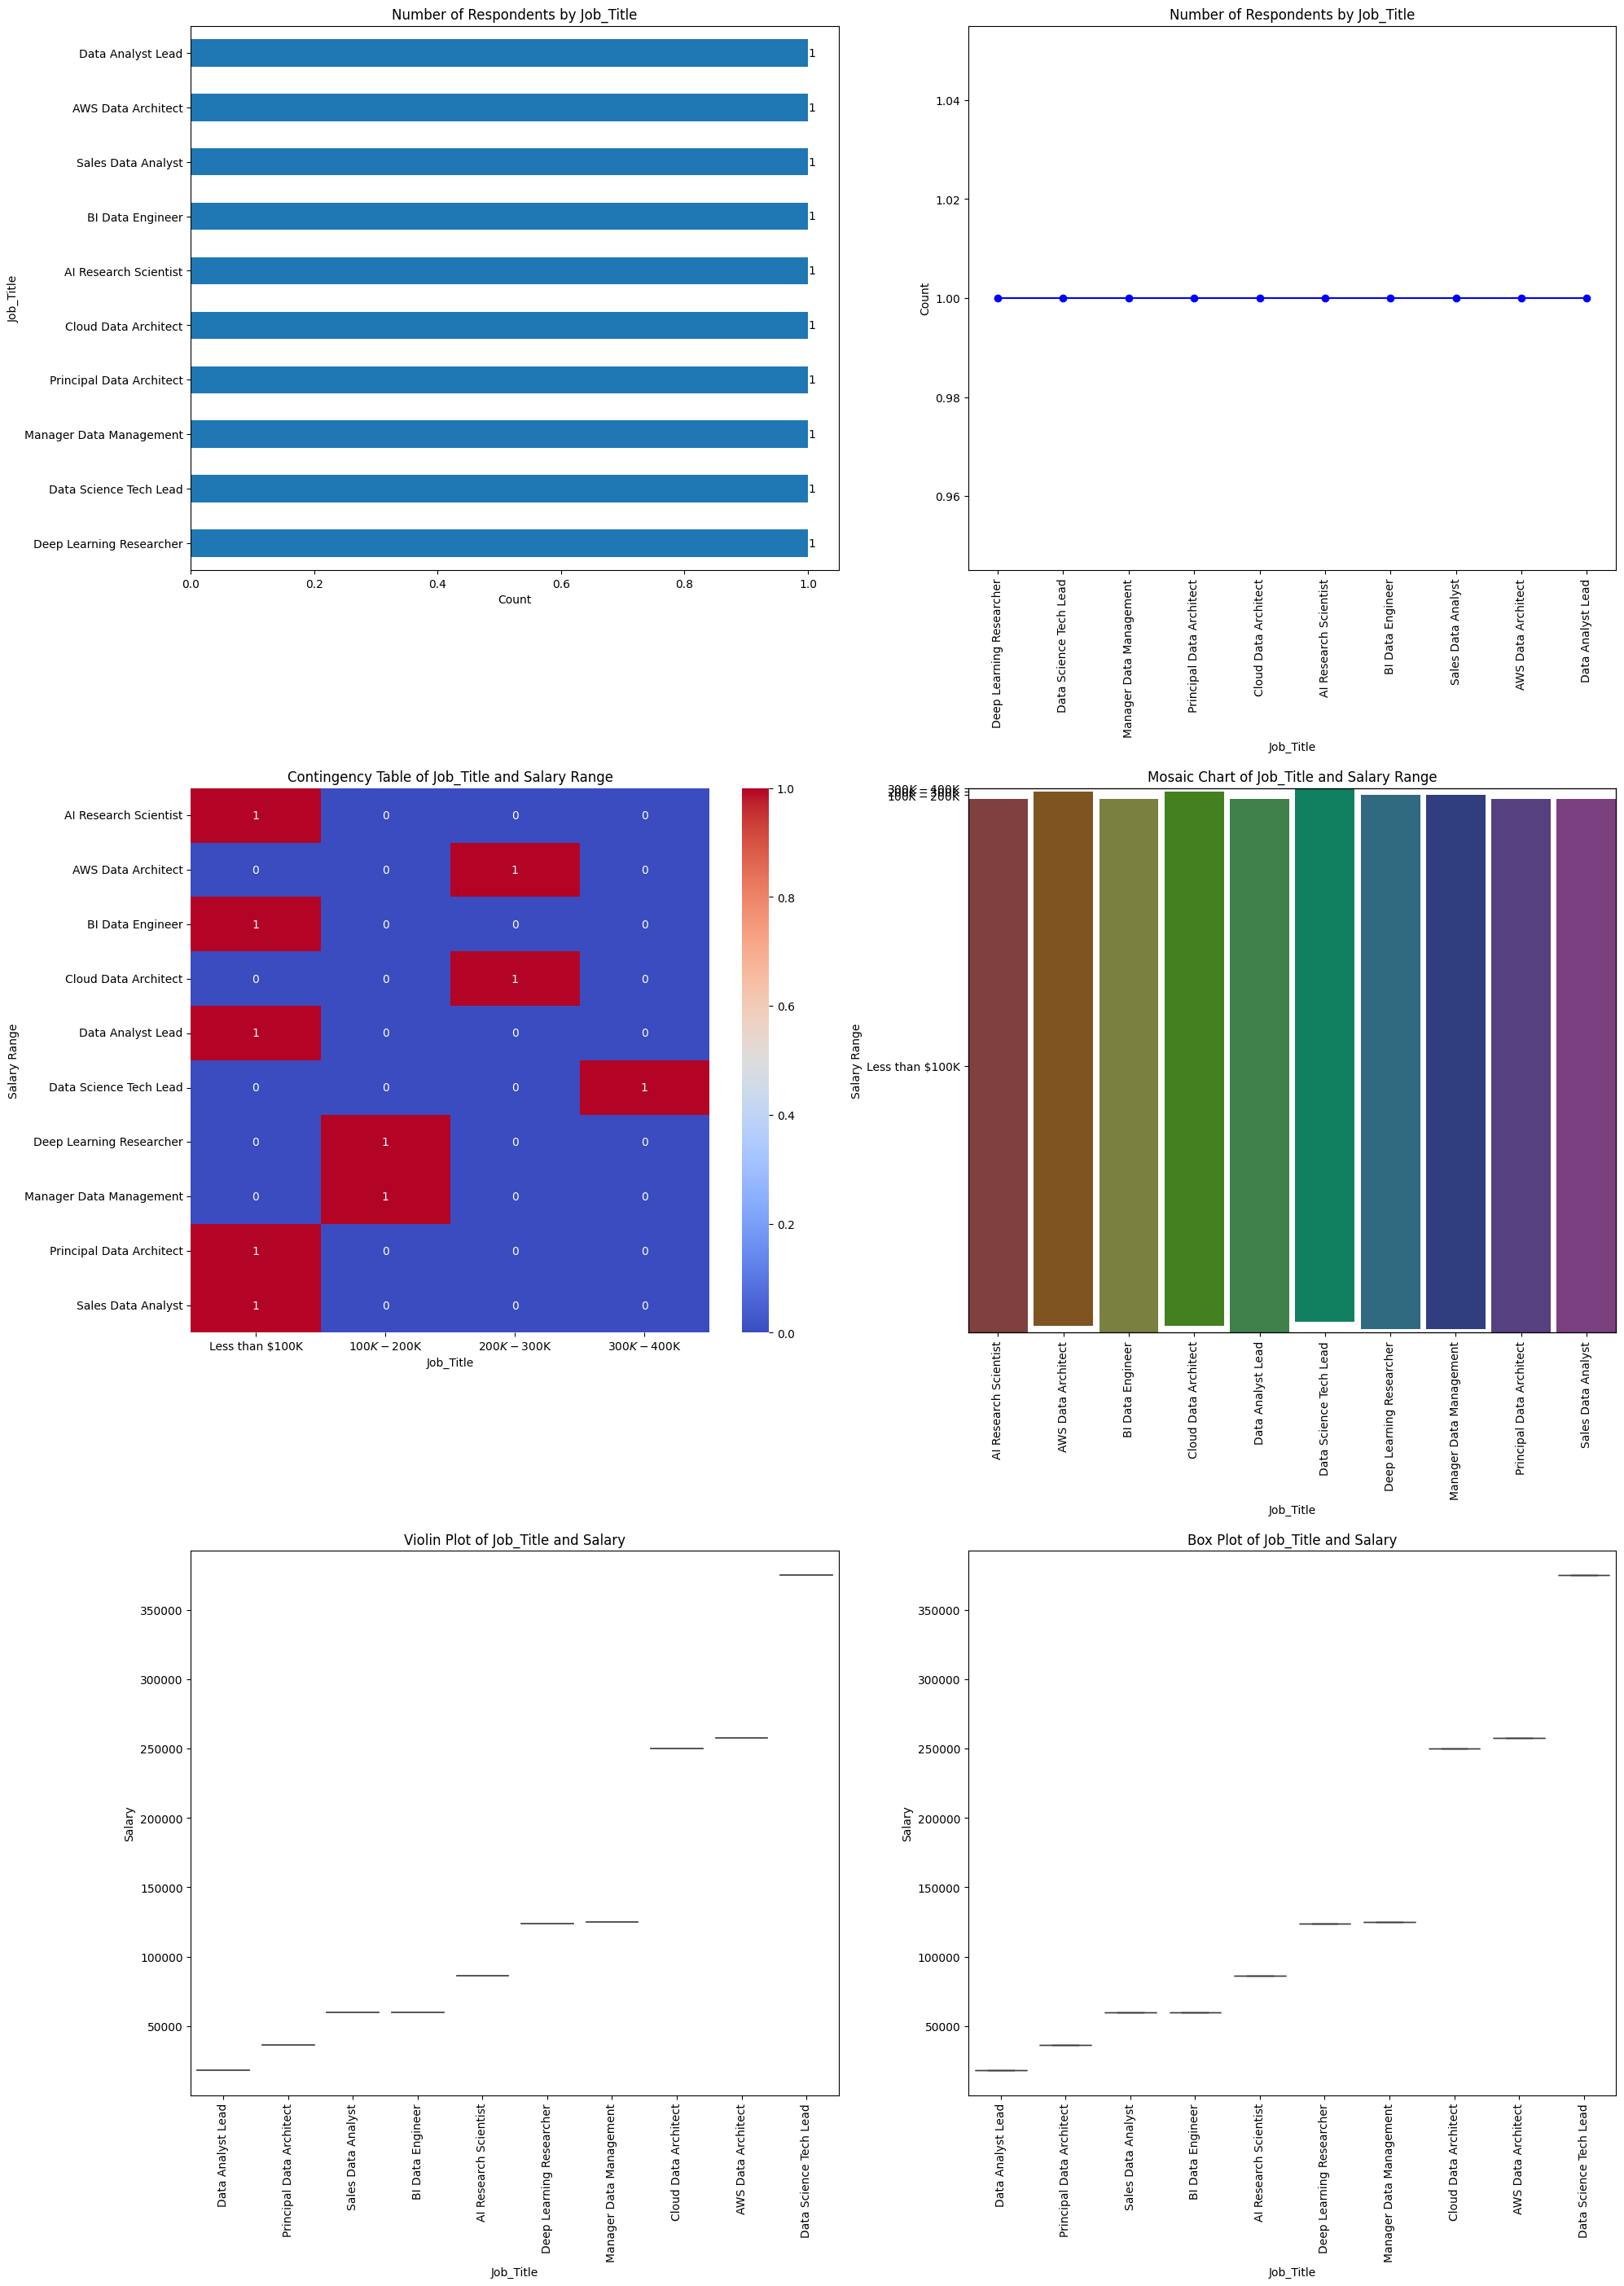

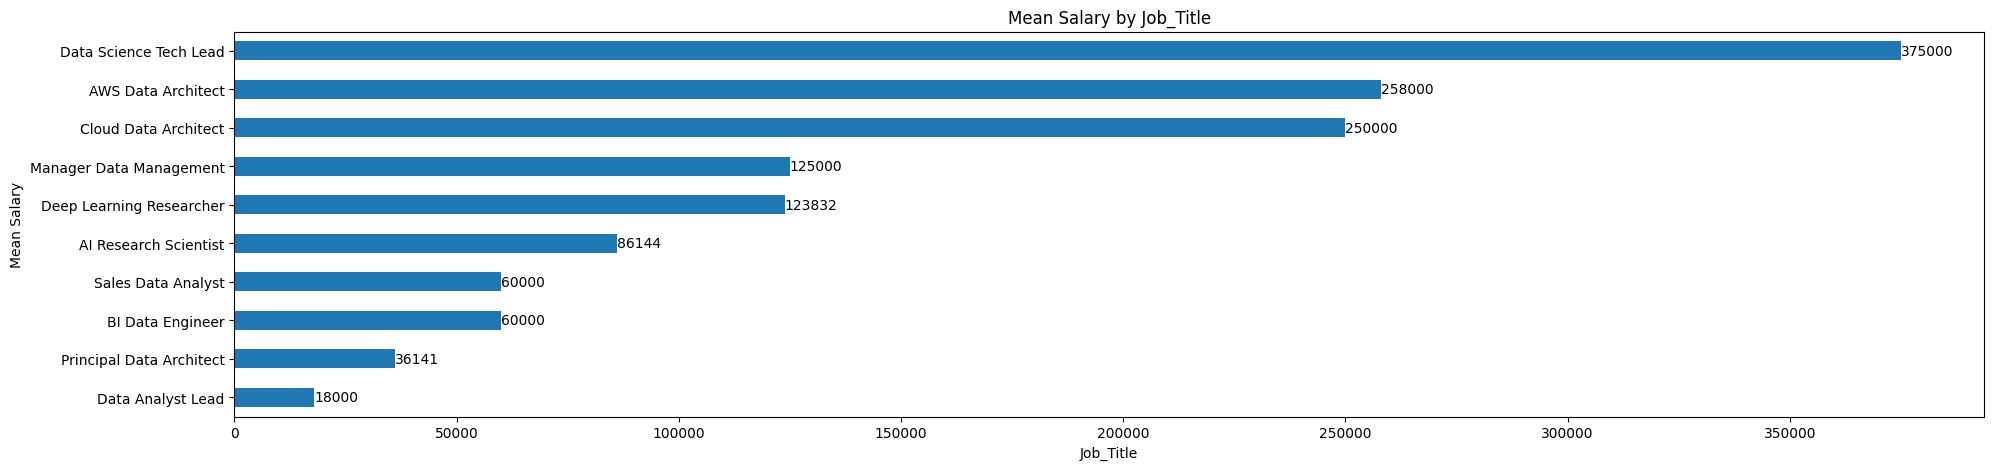

In [64]:
plot_all(df, "Job_Title", largest=False)

As we can see, the job titles 'Data Analyst Lead' and 'Principal Data Architect' have the lowest average salaries in the dataset.


-   Then, let's analyze  each employment type in the dataset.


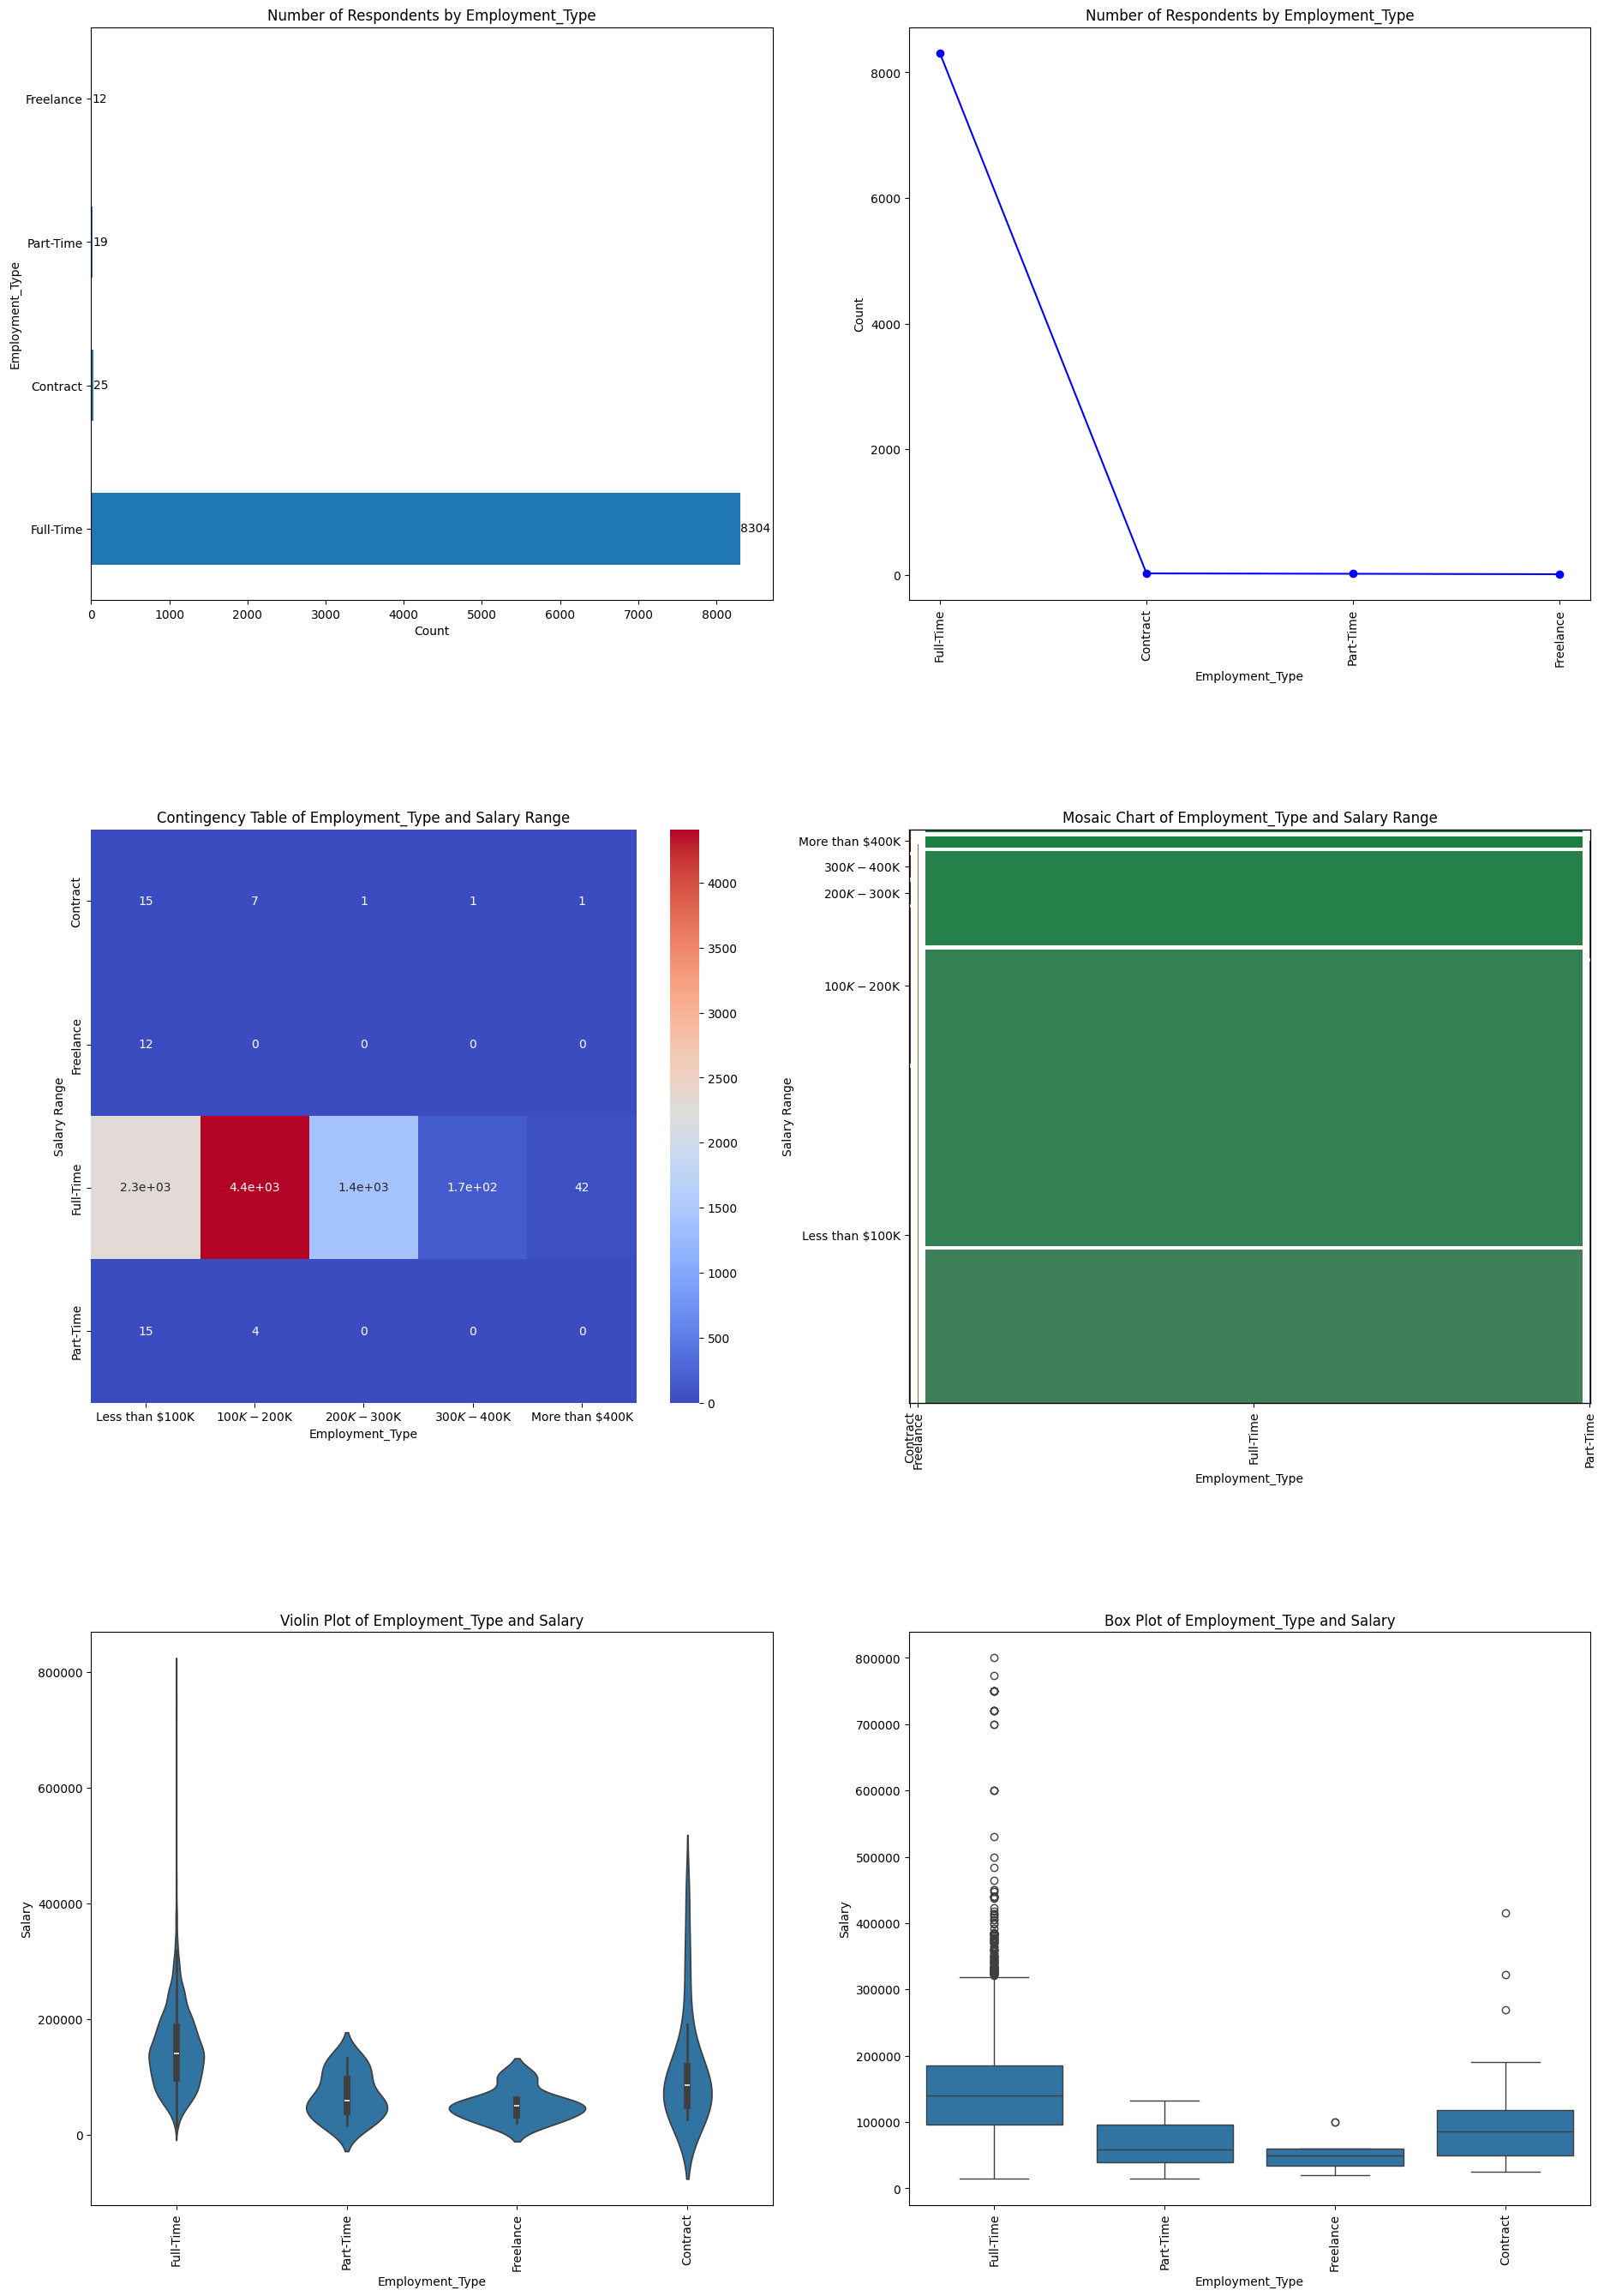

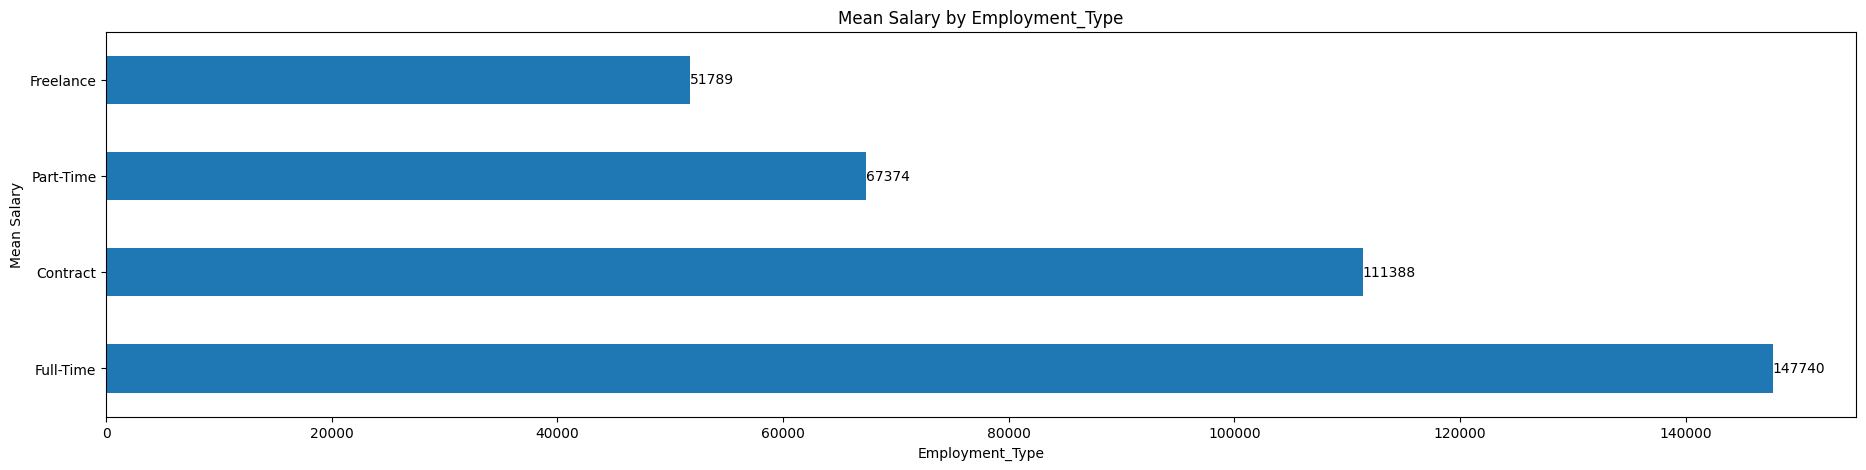

In [65]:
plot_all(df, "Employment_Type", largest=True)

As we can observe in the above plot, almost all of the employment types are 'Full-time'.


-   We can also do the above for experience levels.


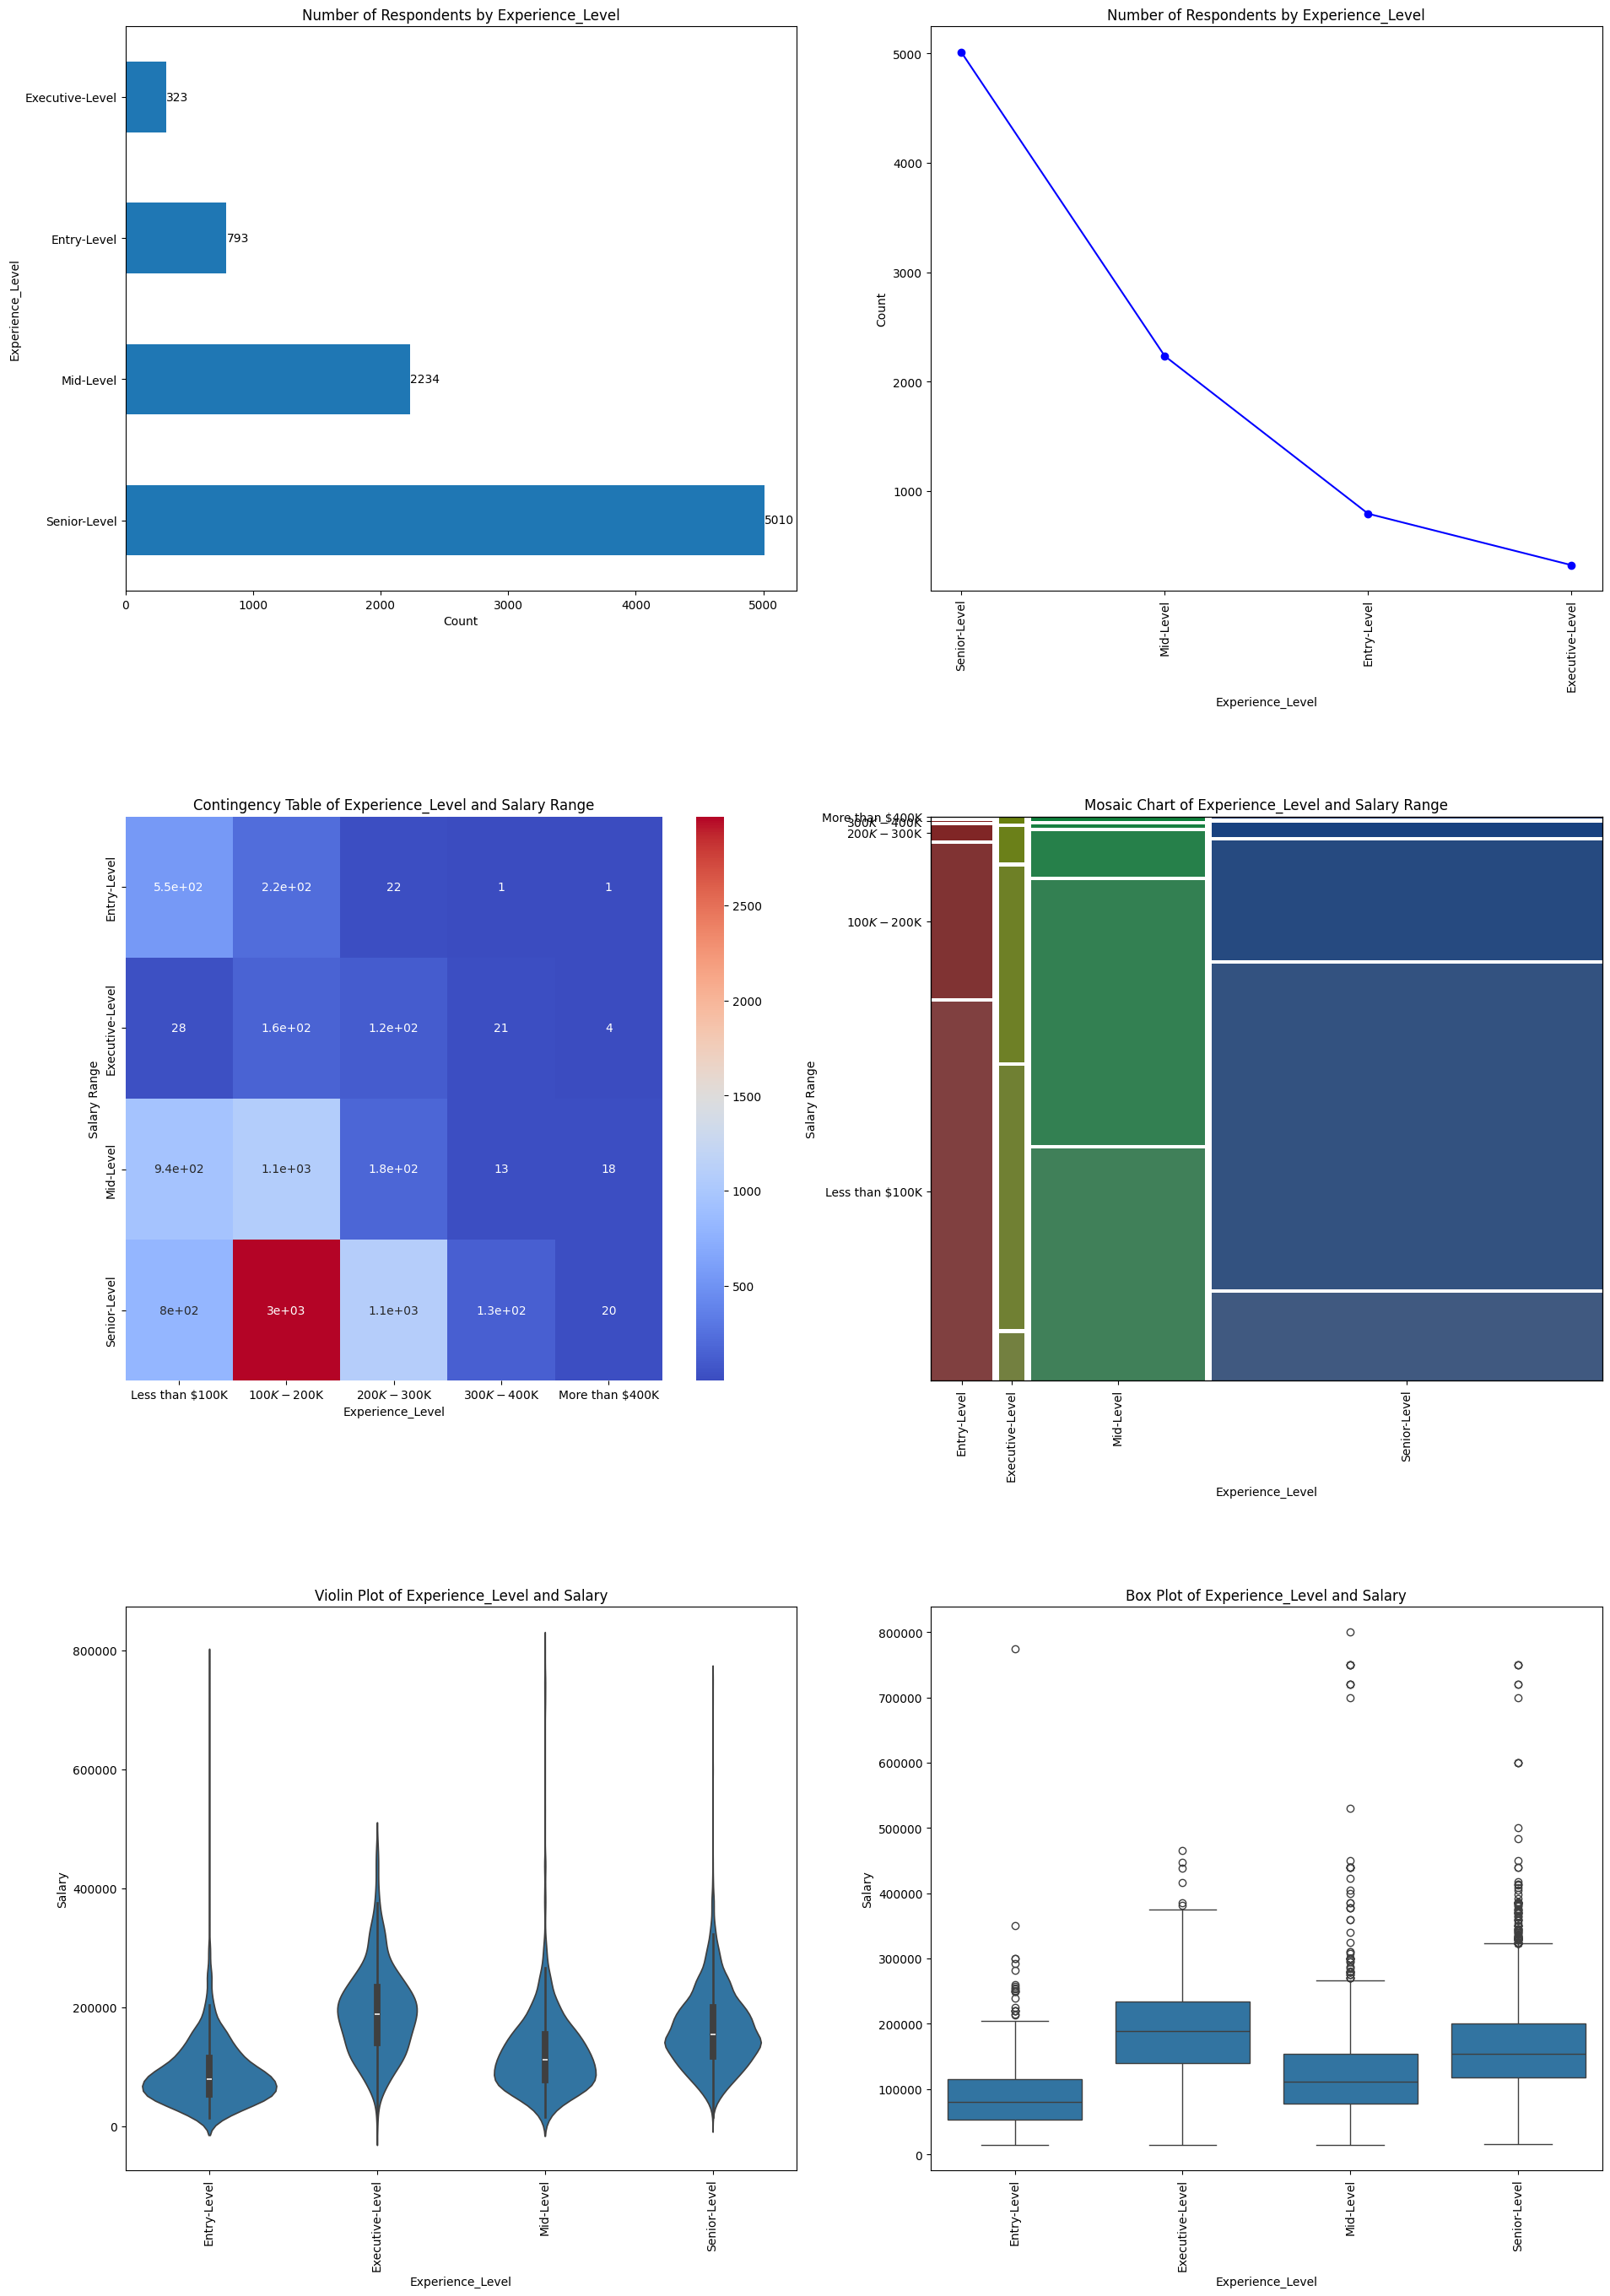

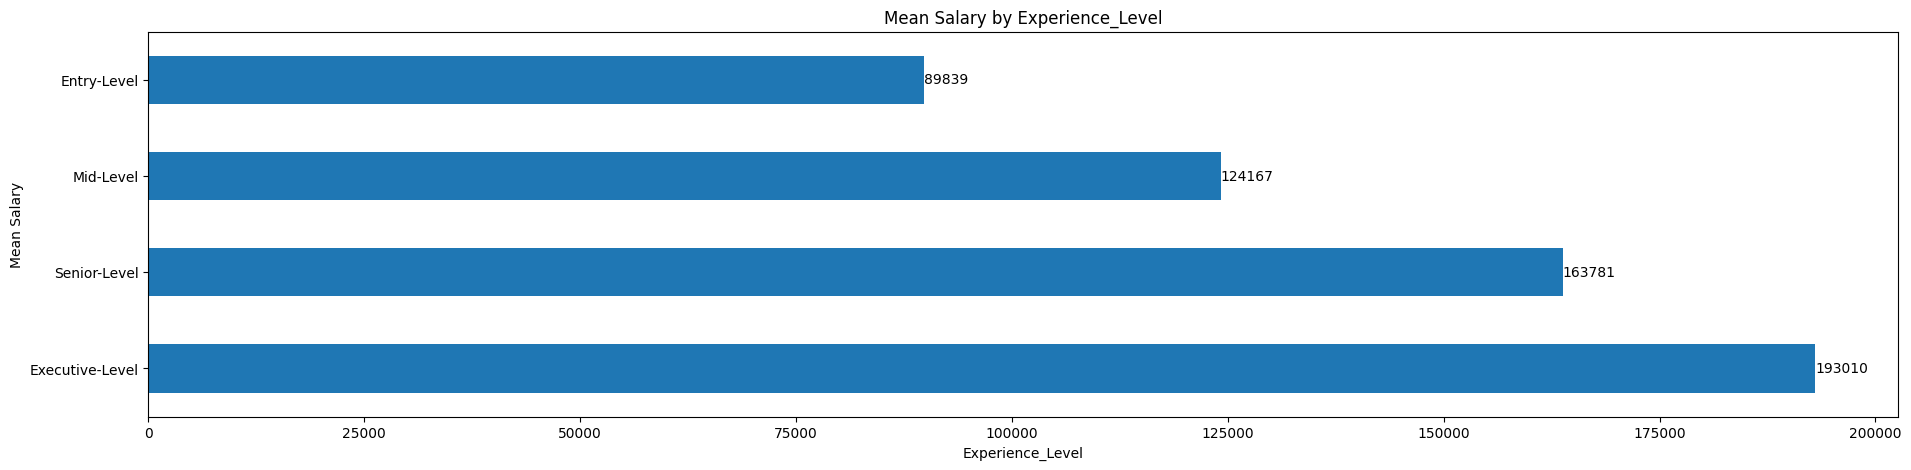

In [66]:
plot_all(df, "Experience_Level", largest=True)

As we can see, most of the experience levels are 'Senior-Level', followed by 'Mid-Level' and 'Entry-Level'. 'Executive-Level' has the lowest frequency in the dataset.


As expected, the average salary increases with the experience level. 'Executive-Level' has the highest average salary, followed by 'Senior-Level' and 'Mid-Level'. 'Entry-Level' has the lowest average salary in the dataset. Also, by using the box plot, we can see that the Senior-Level has the most number of outliers which means that there are some people who have a really high salary in this level.


-   Also, we can analyze data by the company size.


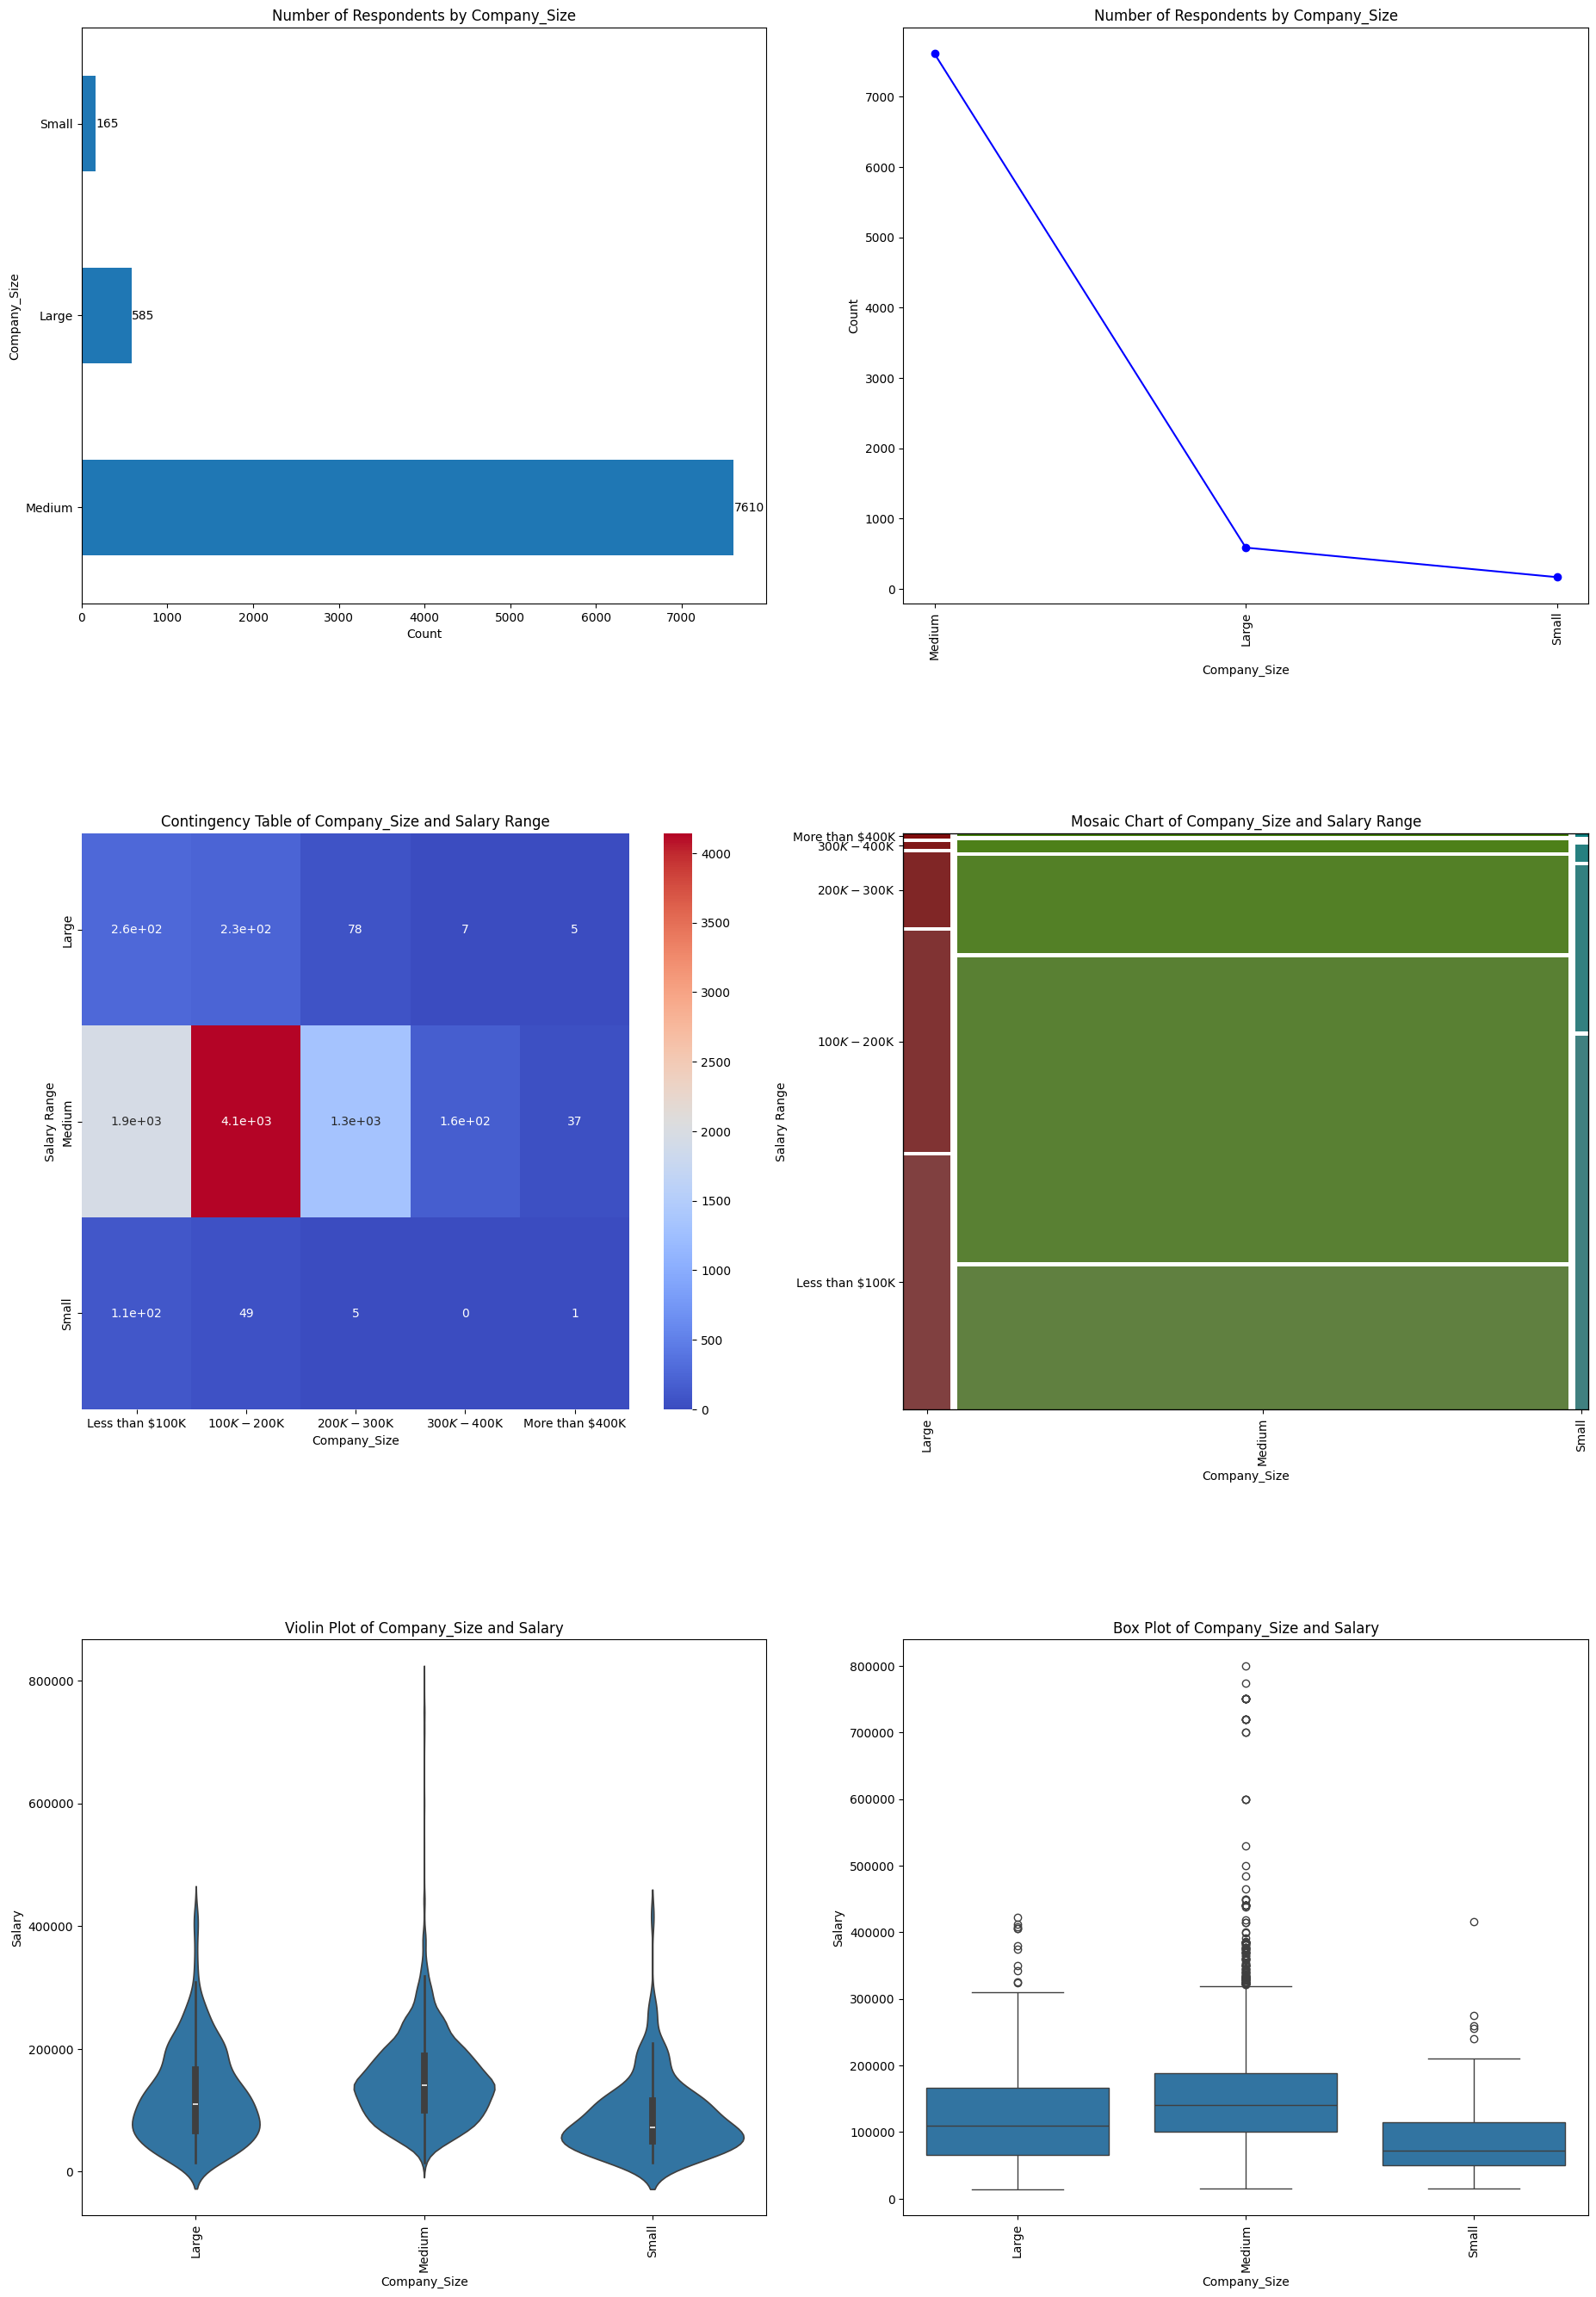

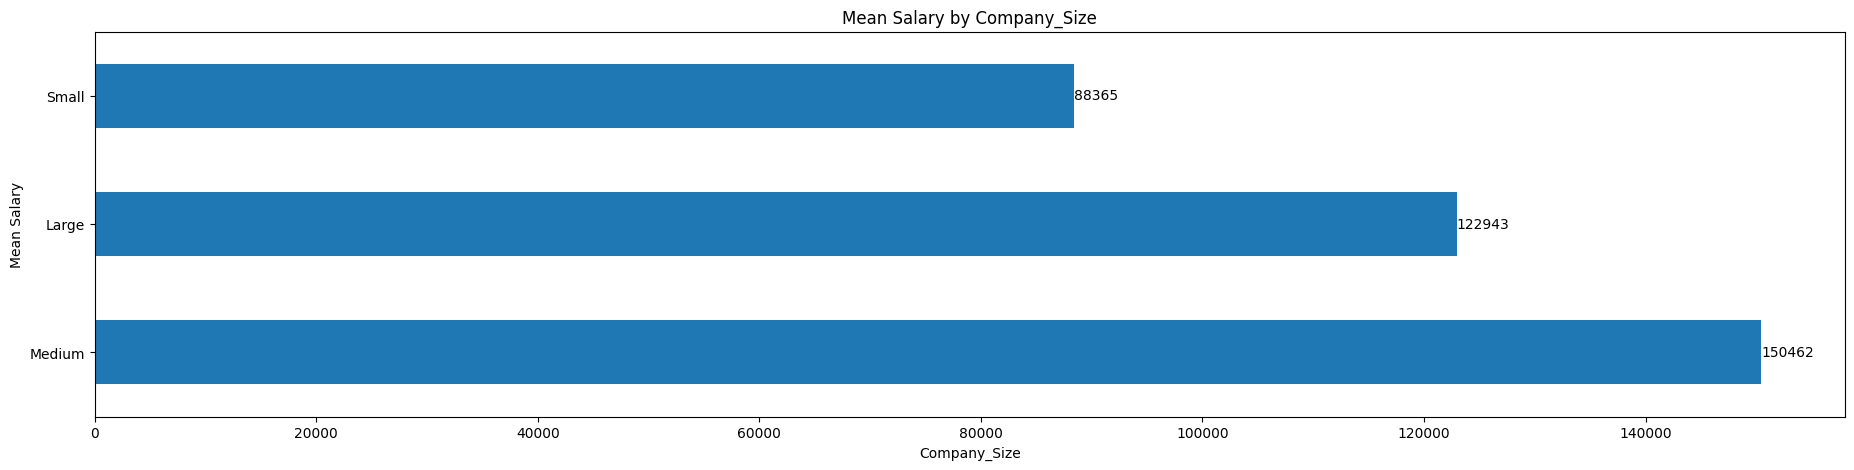

In [67]:
plot_all(df, "Company_Size", largest=True)

As we can see, most of the companies in the dataset are medium-sized, followed by large-sized and small-sized companies.


As we can see, most of the companies are medium-sized, followed by large-sized. Small-sized companies have the lowest frequency in the dataset.

Also, we can see that the number of salaries less than $200,000 is higher than other ranges in all company sizes.


## Resources

-   [Label Encoding and One Hot Encoding](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)
-   [Converting Categories to Numbers](https://medium.com/@brandon93.w/converting-categorical-data-into-numerical-form-a-practical-guide-for-data-science-99fdf42d0e10)
-   [Handling Missing Values](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/)
-   [Forex Python](https://forex-python.readthedocs.io/en/latest/usage.html)
